## 1.0 Introduction
### 1.1 Overview of the Project
Nowadays, the hotel industry is in a dynamic and competitive environment due to the travel industry continuing to grow. Therefore, managing booking cancellations is a key aspect of improving operational efficiency and optimising the revenue of the hotels. This is because, hotel booking cancellations can have a significant impact on hotel revenues, occupancy and resource allocation. However, cancellations are often due to a variety of reasons, including changes in travel plans, price sensitivity or booking errors. Thus, understanding and predicting these cancellations can bring significant benefits to hotel management and enable better customer service. 

This project is focused on predicting hotel booking cancellations using machine learning techniques. We are analysing historical booking data and then using it to identify the patterns and factors that lead to cancellations. 

### 1.2 Objectives and Goals
The primary objective of this project is to build and evaluate predictive models that can accurately forecast hotel booking cancellations. Thus, our goals include:

1.	To identify the patterns and factors contributing to cancellations.

2.	To create and validate machine learning models that predict hotel booking cancellations.

3.	To provide actionable insights that help hotels reduce cancellation rates and improve resource allocation.


### 1.3 Description of the Dataset
To achieve the objectives of predicting hotel booking cancellations and identifying the patterns and factors, we utilised a comprehensive dataset that provides detailed information about bookings in two hotels: Resort Hotel and City Hotel. This dataset serves as the foundation for our analysis and model development. 

Key Features and Structure of the Dataset:

| **Attribute**                   | **Description**                                                                                         | **Data Type**    |
|:--------------------------------|:--------------------------------------------------------------------------------------------------------|:-----------------|
| hotel                           | Hotel Type (Resort Hotel and City Hotel)                                                                | Object           |
| is_canceled                     | Value indicating if the booking was cancelled (1 return cancelled, 0 is not cancelled)                  | Integer          |
| lead_time                       | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date  | Integer          |
| arrival_date_year               | Year of arrival date                                                                                    | Integer          |
| arrival_date_month              | Month of arrival date with 12 categories (January to December)                                          | Object           |
| arrival_date_week_number        | Week number of the arrival date                                                                         | Integer          |
| arrival_date_day_of_month       | Day of the month of the arrival date                                                                    | Integer          |
| stays_in_weekend_nights         | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel           | Integer          |
| stays_in_week_nights            | Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel                 | Integer          |
| adults                          | Number of adults                                                                                        | Integer          |
| children                        | Number of children                                                                                      | Integer          |
| babies                          | Number of babies                                                                                        | Integer          |
| meal                            | Type of meal booked. Categories are presented in standard hospitality meal packages:                    | Object           |
|                                 | Undefined/SC: no meal package                                                                           |                  |
|                                 | BB: Bed and Breakfast                                                                                   |                  |
|                                 | HB: Half board (breakfast and one other meal – usually dinner)                                          |                  |
|                                 | FB: Full board (breakfast, lunch and dinner)                                                            |                  |
| country                         | Country of origin. Categories are represented in the ISO 3155–3:2013 format                             | Object           |
| market_segment                  | Market segment designation (TA means Travel Agents and TO means Tour Operators)                        | Object           |
| distribution_channel            | Booking distribution channel (TA means Travel Agents and TO means Tour Operators)                      | Object           |
| is_repeated_guest               | Value indicating if the booking name was from a repeated guest (1 return repeated, 0 is not repeated)   | Integer          |
| previous_cancellations          | Number of previous bookings that were cancelled by the customer before the current booking              | Integer          |
| previous_bookings_not_canceled  | Number of previous bookings not cancelled by the customer before the current booking                    | Integer          |
| reserved_room_type              | Code of room type reserved                                                                             | Object           |
| assigned_room_type              | Code for the type of room assigned to the booking                                                      | Object           |
| booking_changes                 | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | Integer          |
| deposit_type                    | Indication on if the customer deposited to guarantee the booking. This variable can assume three categories: | Object |
|                                 | No Deposit: No deposit was made                                                                        |                  |
|                                 | Non Refund: A deposit was made in the value of the total stay cost                                     |                  |
|                                 | Refundable: A deposit was made with a value under the total cost of stay                               |                  |
| agent                           | ID of the travel agency that made the booking                                                          | Float            |
| company                         | ID of the company/entity that made the booking or is responsible for paying the booking                | Float            |
| days_in_waiting_list            | Number of days the booking was in the waiting list before it was confirmed to the customer              | Integer          |
| customer_type                   | Type of booking, assuming one of four categories:                                                      | Object           |
|                                 | Contract: When the booking has an allotment or other type of contract associated to it                 |                  |
|                                 | Group: When the booking is associated with a group                                                     |                  |
|                                 | Transient: When the booking is not part of a group or contract and is not associated with other transient booking | |
|                                 | Transient-party: When the booking is transient, but is associated with at least other transient bookings | |
| adr                             | Average Daily Rate                                                                                     | Float            |
| required_car_parking_spaces     | Number of car parking spaces required by the customer                                                  | Integer          |
| total_of_special_requests       | Number of special requests made by the customer (e.g. twin bed or high floor)                          | Integer          |
| reservation_status              | Reservation last status, assuming one of three categories (Cancelled, Check-Out and No-show)           | Object           |
| reservation_status_date         | The date at which the last status was set                                                              | DateTime         |


The dataset contains approximately 119,390 observations and 32 features. It provides a robust base for both exploratory analysis and predictive modelling. It is structured in a tabular format with each row representing a unique booking and each column representing an attribute of that booking.

## 2.0 Exploratory Data Analysis
### 2.1 Data Preprocessing

**The data is loaded from the CSV file and the first few rows are printed to give an initial view of the dataset**

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import calendar
import numpy as np
import geopandas as gpd
import pycountry
from IPython.display import display, Markdown

In [51]:
# Load the dataset
file_path = r"hotel_bookings.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Next, we get an overview of the data, showing the data types

In [52]:
# Get an overview of the dataframe
print("\nDataframe info:")
df.info()


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12 

#### 2.1.1 Checking Missing Values

**We check for missing values in each column of our dataset**

Additionally, we visualise the missing data using a heatmap


Missing values in each column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                    

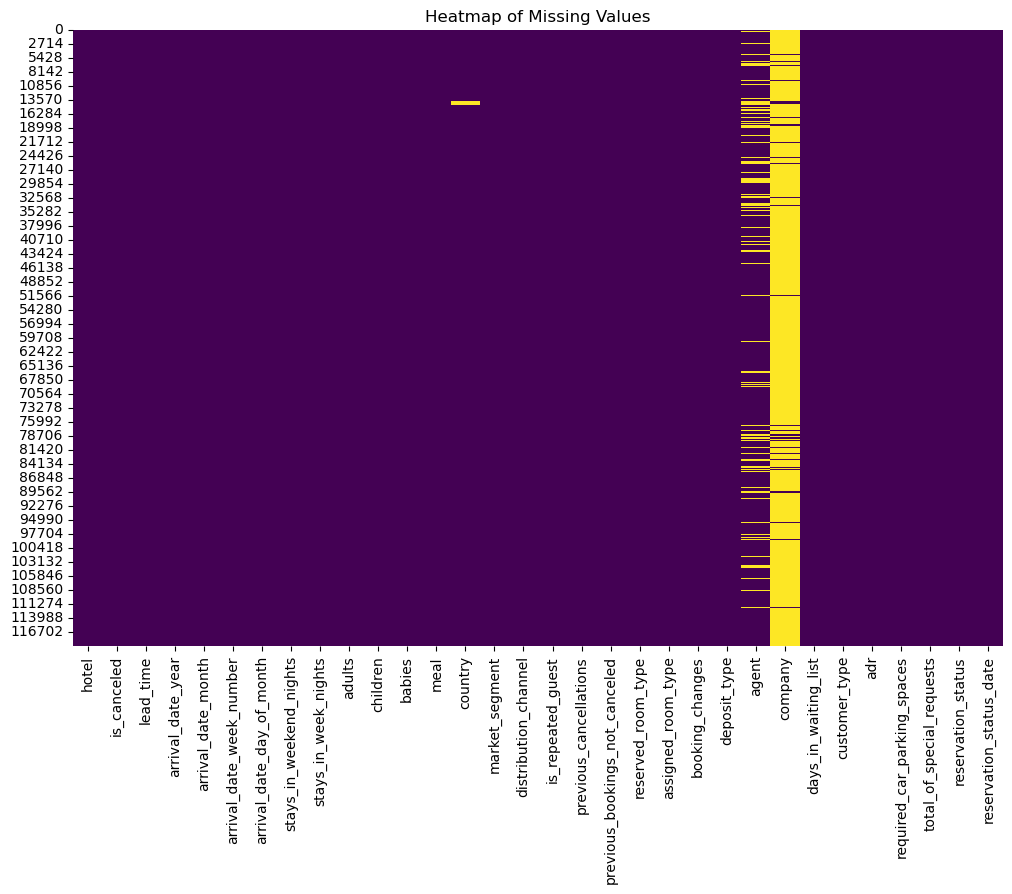

In [53]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Optionally, visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()


#### 2.1.2 Handling Missing Values
1. we drop both agent and company columns as they are a lot of missing data in the column, and both these columns are considered not important in our coming analysis
2. we fill countries (categorical column) with mode and children (numerical column) with mean, as we need the data for the columns

In [54]:
# Handle missing values

# Fill missing values in the 'country' column with the mode
df['country'] = df['country'].fillna(df['country'].mode()[0])
# Fill missing values in 'children' column with mean before converting to int
df['children'] = df['children'].fillna(df['children'].mean())

# Drop the 'agent' and 'company' columns as they are not needed
df = df.drop(columns=['agent', 'company'])

# Verify missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces     

Missing values are visualized and then filled. Numerical columns are filled with the mean, and categorical columns are filled with the mode. This ensures that no data is missing


#### 2.1.3 Converting Data Types

**Data transformation - converting to more appropriate data types**

In [55]:
# Convert data types if necessary (example: date columns)
# Suppose there's a column 'reservation_status_date' that should be datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Convert 'children' to int64
df['children'] = df['children'].astype('int64')

# Verify the changes
print("\nData types after conversion:\n")
print(df.info())



Data types after conversion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                 

From the output above, we can observe that the data types for specific columns have been successfully modified

### 2.2 Data Visualisation and Insights

#### 2.2.1 How Many Bookings Were Cancelled?

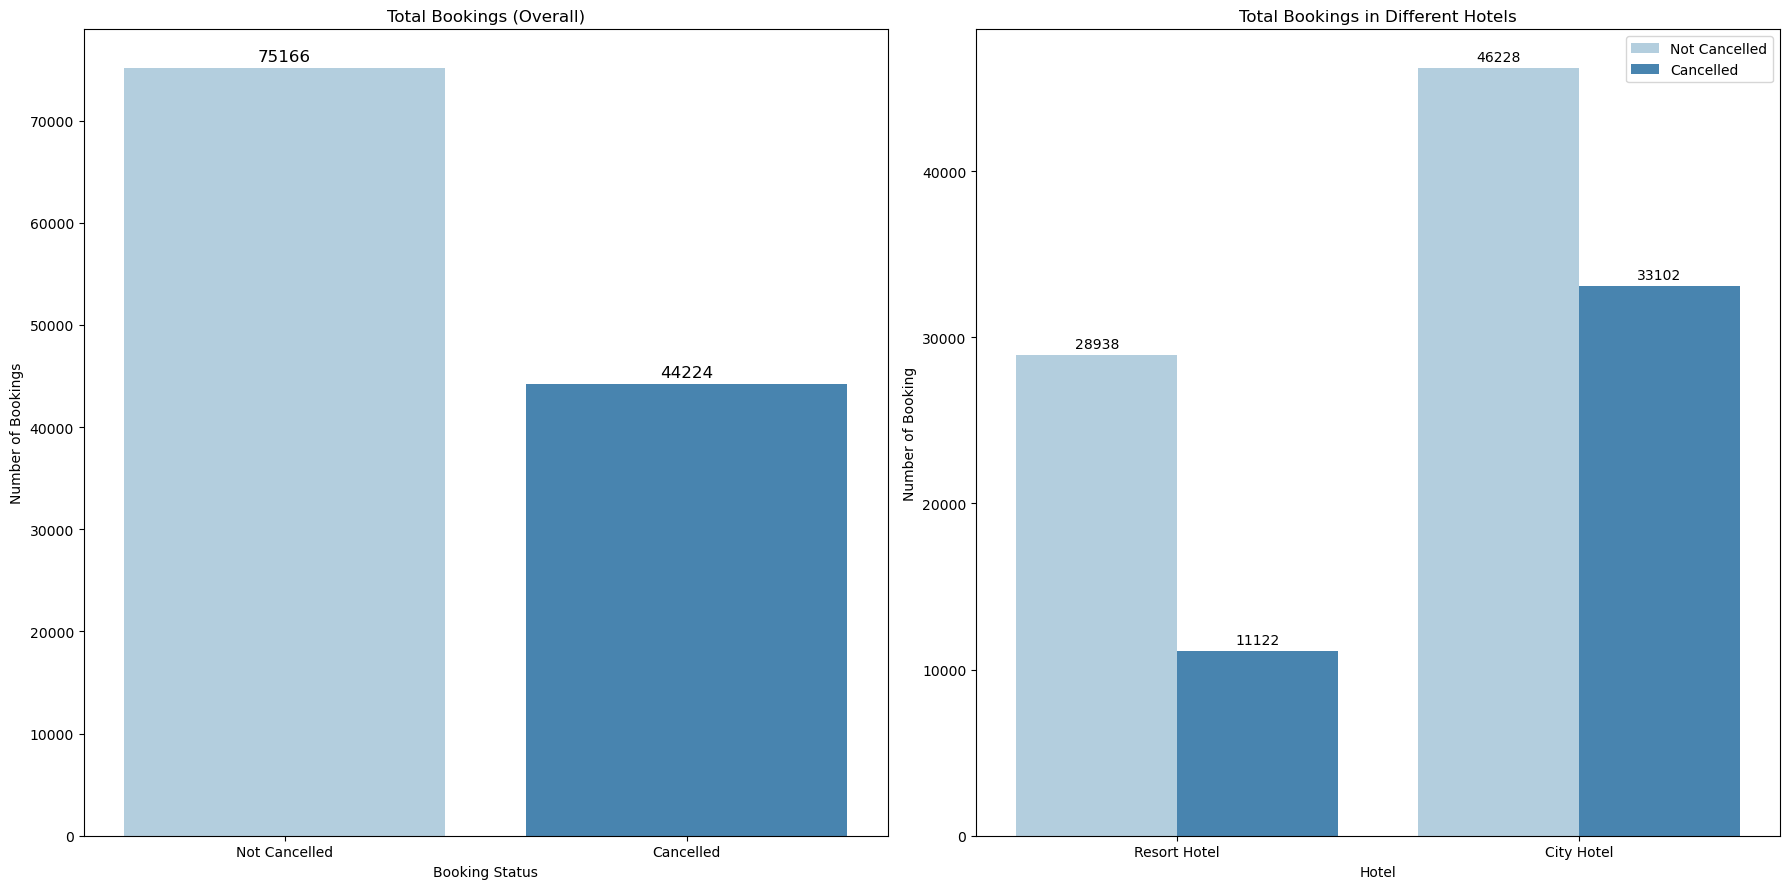

Total number of bookings: 119390
Total number of bookings cancelled: 44224


In [56]:
# Calculate the number of cancellations
num_cancelled = df['is_canceled'].sum()
total_bookings = df.shape[0]

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# First plot: Total Bookings
ax = sns.countplot(x='is_canceled', data=df, palette='Blues', ax=axes[0])
axes[0].set_title('Total Bookings (Overall)')
axes[0].set_xlabel('Booking Status')
axes[0].set_ylabel('Number of Bookings')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Cancelled', 'Cancelled'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Second plot: Reservation status in different hotels
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues', ax=axes[1])
axes[1].set_title('Total Bookings in Different Hotels', size=12, color='Black')
axes[1].set_xlabel('Hotel', color='Black')
axes[1].set_ylabel('Number of Booking', color='Black')

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
axes[1].legend(bbox_to_anchor=(1, 1))

# Customize legend labels
axes[1].legend(['Not Cancelled', 'Cancelled'])

# Annotate each bar with the count value
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Print the results
print(f"Total number of bookings: {total_bookings}")
print(f"Total number of bookings cancelled: {num_cancelled}")

**Analysis:**

The dataset contains a total of 119,390 bookings, while 44,224 of them were cancelled. The bar chart provides a clear visual representation, showing that a significant portion of the bookings (approximately 37%) were cancelled, while the majority (about 63%) were not cancelled. The sub plot displays the number of reservations for Resort Hotel and City Hotel, with further segmentation into cancelled and not cancelled bookings. The number of cancelled bookings for Resort Hotel is 11,122, accounting for 25% of the total cancelled bookings, while for City Hotel, there are 33,102 cancellations, making up 75% of the total cancelled bookings.

#### 2.2.2  What is the booking ratio between Resort Hotel and City Hotel?

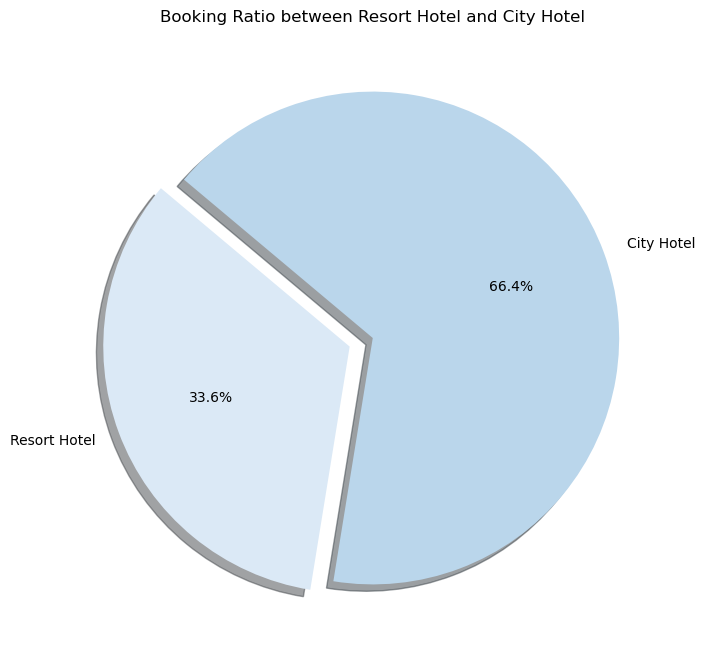

Total number of Resort Hotel bookings: 40060
Total number of City Hotel bookings: 79330
Booking ratio (Resort Hotel : City Hotel) = 1:2


In [57]:
# Calculate the total number of bookings for each hotel type
resort_bookings = df[df['hotel'] == 'Resort Hotel'].shape[0]
city_bookings = df[df['hotel'] == 'City Hotel'].shape[0]

# Calculate the booking ratio
booking_ratio = resort_bookings / city_bookings

# Visualization of booking distribution using a pie chart
labels = ['Resort Hotel', 'City Hotel']
sizes = [resort_bookings, city_bookings]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Resort Hotel)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors = sns.color_palette('Blues'), autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Booking Ratio between Resort Hotel and City Hotel')
plt.show()

# Print the results
print(f"Total number of Resort Hotel bookings: {resort_bookings}")
print(f"Total number of City Hotel bookings: {city_bookings}")
print(f"Booking ratio (Resort Hotel : City Hotel) = 1:2")

**Analysis:**

Resort Hotel has a total of 40,060 bookings while City Hotel has a total of 79,330 bookings. The booking ratio between Resort Hotel and City Hotel is 1:2. This means that for every booking at the Resort Hotel, there are approximately two bookings at the City Hotel. A pie chart visually represents this ratio, showing that City Hotel bookings constitute a larger portion of the total bookings (about 66.4%), while Resort Hotel bookings make up the remaining 33.6%.

#### 2.2.3 What is the percentage of booking for each year?

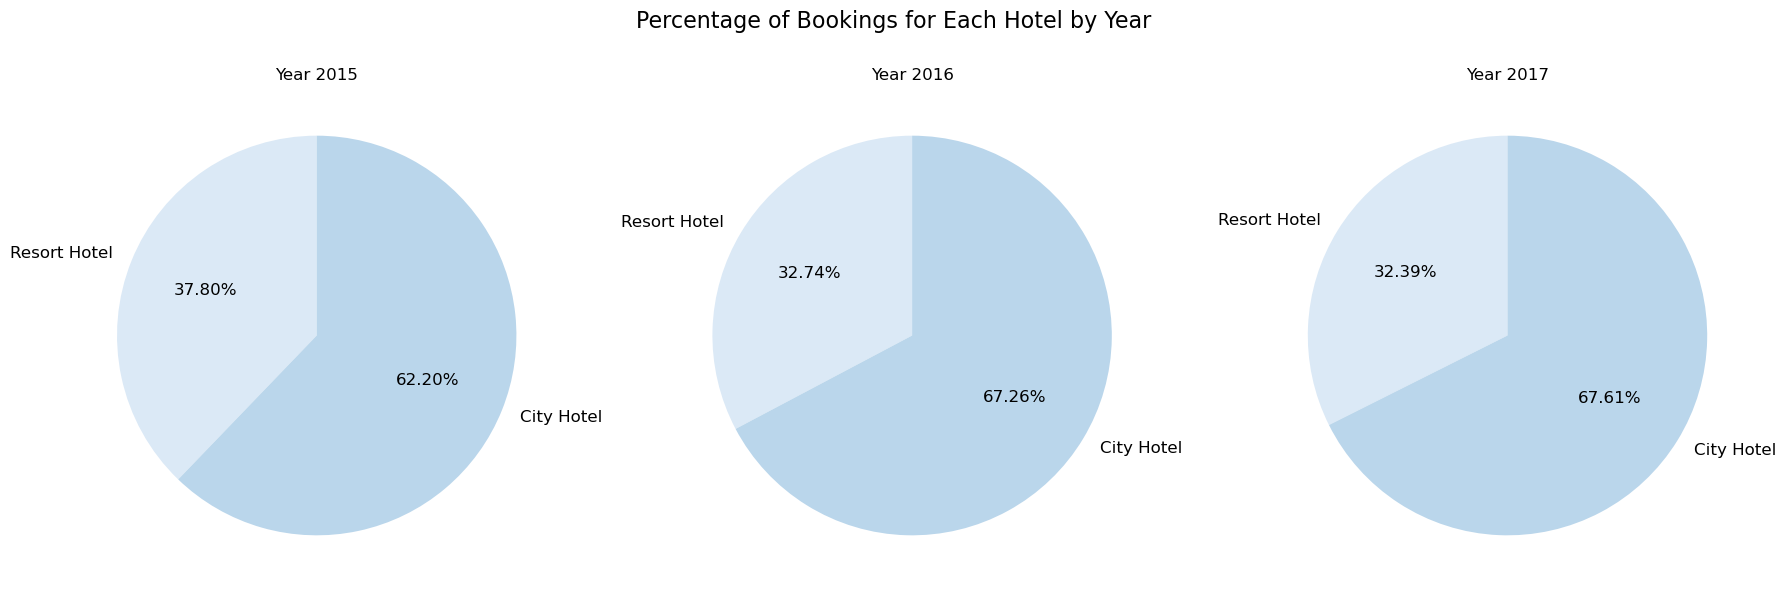

Percentage of bookings for each year:
Year 2015:
  Resort Hotel: 37.80%
  City Hotel: 62.20%

Year 2016:
  Resort Hotel: 32.74%
  City Hotel: 67.26%

Year 2017:
  Resort Hotel: 32.39%
  City Hotel: 67.61%



In [58]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the necessary data
# List of unique years in the dataset
years = sorted(df['arrival_date_year'].unique())

# Define colors for the pie charts
colors = ['lightcoral', 'skyblue']

# Create subplots: one for each year
fig, axes = plt.subplots(1, len(years), figsize=(18, 6))

# Initialize a dictionary to store percentages
booking_percentages = {}

for i, year in enumerate(years):
    # Filter data for the given year
    df_year = df[df['arrival_date_year'] == year]

    # Calculate the total number of bookings for each hotel
    total_resort_bookings = df_year[df_year['hotel'] == 'Resort Hotel'].shape[0]
    total_city_bookings = df_year[df_year['hotel'] == 'City Hotel'].shape[0]

    # Calculate the total number of bookings overall for the year
    total_bookings_year = total_resort_bookings + total_city_bookings

    # Compute the percentage of bookings for each hotel
    percentage_resort_bookings = (total_resort_bookings / total_bookings_year) * 100
    percentage_city_bookings = (total_city_bookings / total_bookings_year) * 100

    # Prepare data for the pie chart
    labels = ['Resort Hotel', 'City Hotel']
    sizes = [percentage_resort_bookings, percentage_city_bookings]

    # Plot pie chart for the year
    wedges, texts, autotexts = axes[i].pie(sizes, labels=labels, colors = sns.color_palette('Blues'), autopct='%1.2f%%', startangle=90)
    axes[i].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    axes[i].set_title(f'Year {year}')
    for text in texts + autotexts:
        text.set_fontsize(12)

    # Store the percentages in the dictionary
    booking_percentages[year] = {
        'Resort Hotel': percentage_resort_bookings,
        'City Hotel': percentage_city_bookings
    }

# Set the title for the entire figure
fig.suptitle('Percentage of Bookings for Each Hotel by Year', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Display the plot
plt.show()

# Print the percentages after visualisation
print("Percentage of bookings for each year:")
for year in years:
    percentages = booking_percentages[year]
    print(f"Year {year}:")
    print(f"  Resort Hotel: {percentages['Resort Hotel']:.2f}%")
    print(f"  City Hotel: {percentages['City Hotel']:.2f}%")
    print()

**Analysis:**

In the years 2015 to 2017, there were a total of 21,996, 56,707, and 40,687 bookings respectively for both hotels. From the pie chart in Figure 9, we can clearly see the percentage distribution of bookings for each year. The table below shows the detailed percentages:

| **Hotels**       | **Year** | **2015** | **2016** | **2017** |
|:-----------------|:---------|:---------|:---------|:---------|
| **Resort Hotel** |          | 37.80%   | 32.74%   | 32.39%   |
| **City Hotel**   |          | 62.20%   | 67.26%   | 67.61%   |

Therefore, it is visible that City Hotel has a clear dominance, capturing more than 60% of the bookings each year. In contrast, Resort Hotel accounts for less than 40%. This consistent trend indicates a strong preference for City Hotel over Resort Hotel across the three-year period.


#### 2.2.4 Which is the busiest month for hotel?

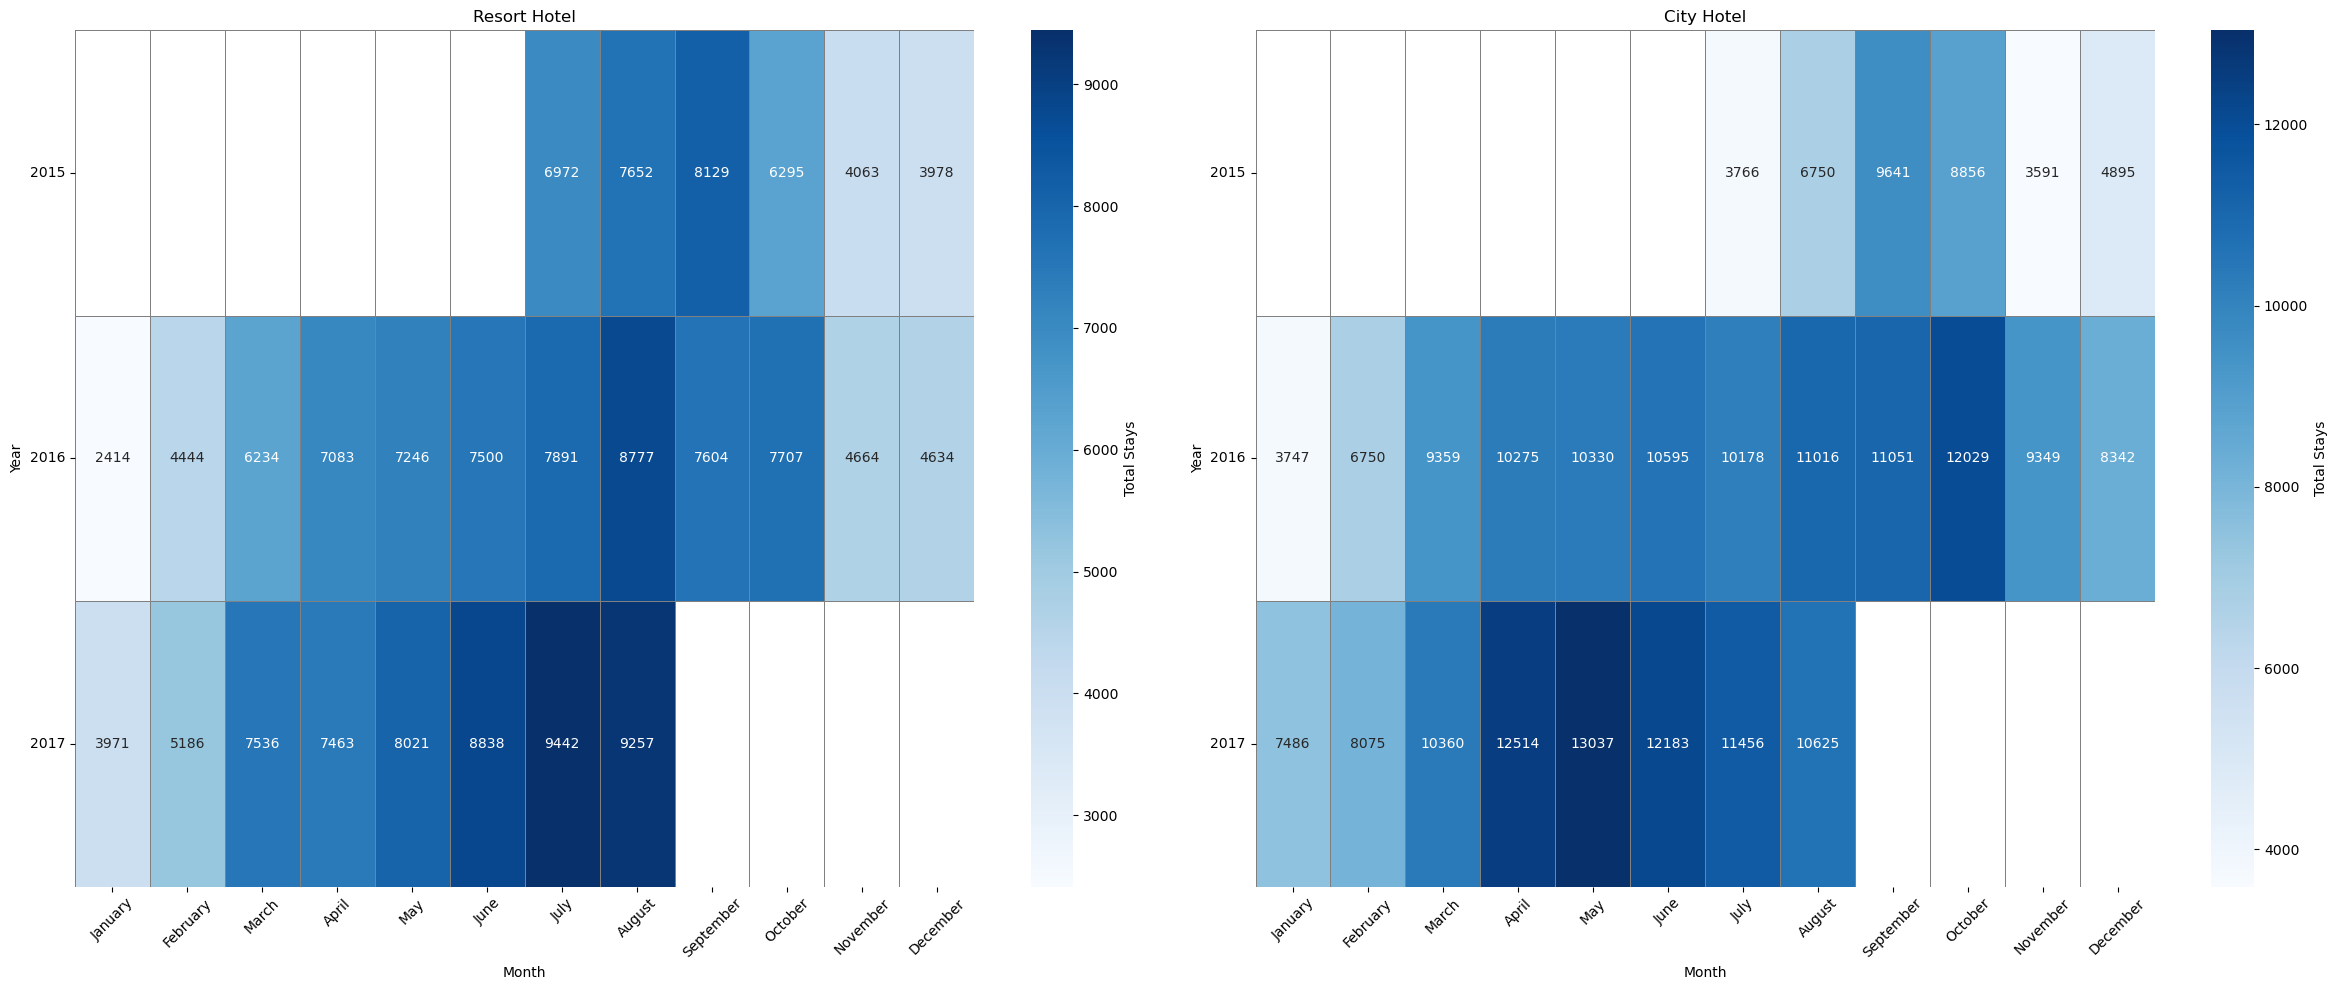

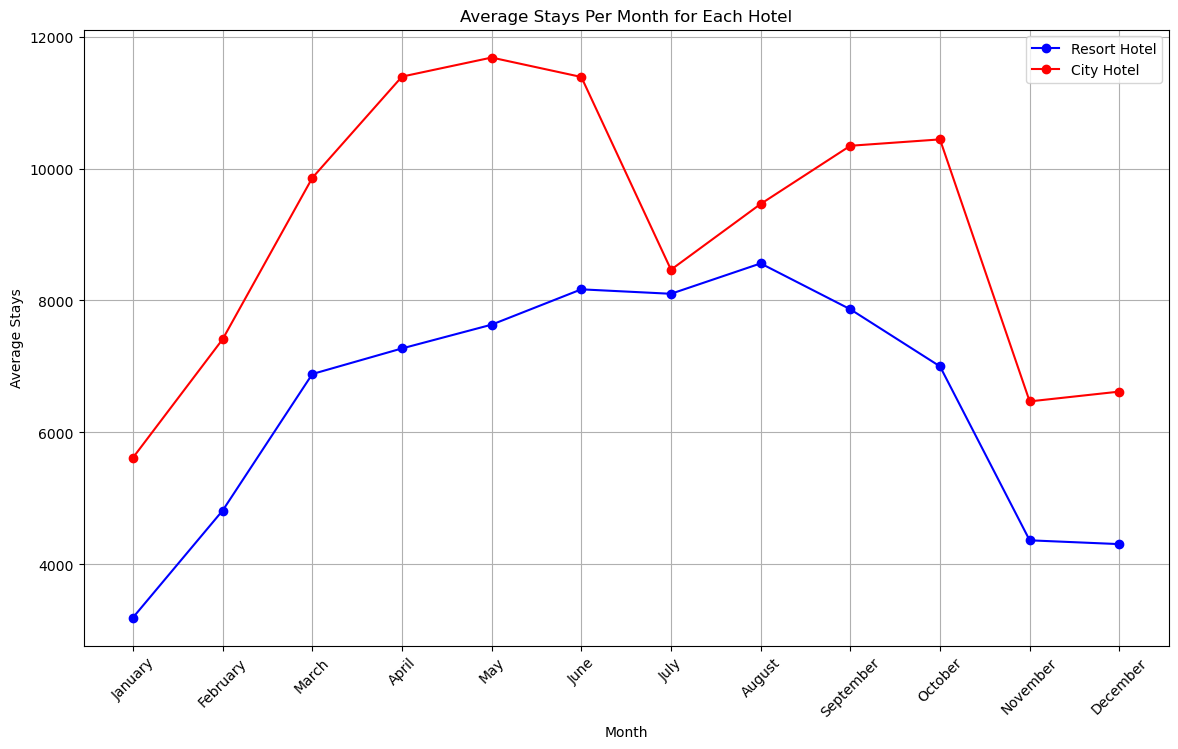

The busiest month for Resort Hotel is August.
The busiest month for City Hotel is May.


In [59]:
# Create a datetime column from year, month, and day
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str), 
                                    format='%Y-%B-%d')

# Assuming 'total_nights' is the sum of 'stays_in_weekend_nights' and 'stays_in_week_nights'
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Function to prepare data for the heatmap
def prepare_heatmap_data(hotel_type):
    # Filter data for the specific hotel type
    hotel_df = df[df['hotel'] == hotel_type]
    
    # Group by 'arrival_date_year' and 'arrival_date_month' and calculate total stays
    monthly_stays = hotel_df.groupby(['arrival_date_year', 'arrival_date_month'])[['total_nights']].sum().reset_index()
    
    # Convert month names to numbers for easier processing
    monthly_stays['arrival_date_month_num'] = pd.to_datetime(monthly_stays['arrival_date_month'], format='%B').dt.month
    
    return monthly_stays

# Function to create a calendar-style heatmap
def create_calendar_heatmap(ax, monthly_stays, hotel_name):
    heatmap_data = monthly_stays.pivot(index='arrival_date_year', columns='arrival_date_month_num', values='total_nights')
    
    # Create the heatmap
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Total Stays'}, linewidths=0.5, linecolor='gray', ax=ax)
    
    # Set the month names as x-axis labels
    ax.set_xticks(np.arange(12) + 0.5)
    ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)], rotation=45)
    
    # Set the year names as y-axis labels
    ax.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
    ax.set_yticklabels(heatmap_data.index, rotation=0)
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Year')
    ax.set_title(f'{hotel_name}')

# Prepare data for Resort Hotel
resort_monthly_stays = prepare_heatmap_data('Resort Hotel')

# Prepare data for City Hotel
city_monthly_stays = prepare_heatmap_data('City Hotel')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Create calendar heatmap for Resort Hotel
create_calendar_heatmap(axes[0], resort_monthly_stays, 'Resort Hotel')

# Create calendar heatmap for City Hotel
create_calendar_heatmap(axes[1], city_monthly_stays, 'City Hotel')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Calculate the average stays per month for each hotel across all years
monthly_stays_combined = df.groupby(['hotel', 'arrival_date_month'])[['total_nights']].sum().reset_index()
monthly_stays_combined['total_years'] = df.groupby(['hotel', 'arrival_date_month'])[['arrival_date_year']].nunique().reset_index(drop=True)
monthly_stays_combined['average_stays'] = monthly_stays_combined['total_nights'] / monthly_stays_combined['total_years']

# Pivot the data to have months as columns and hotels as rows
monthly_stays_pivot = monthly_stays_combined.pivot(index='arrival_date_month', columns='hotel', values='average_stays')

# Reindex the DataFrame to ensure the correct month order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_stays_pivot = monthly_stays_pivot.reindex(months_order)

# Plot the line graph
plt.figure(figsize=(14, 8))
plt.plot(monthly_stays_pivot.index, monthly_stays_pivot['Resort Hotel'], marker='o', label='Resort Hotel', color='blue')
plt.plot(monthly_stays_pivot.index, monthly_stays_pivot['City Hotel'], marker='o', label='City Hotel', color='red')
plt.title('Average Stays Per Month for Each Hotel')
plt.xlabel('Month')
plt.ylabel('Average Stays')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Find the busiest month for each hotel
busiest_month_resort = monthly_stays_pivot['Resort Hotel'].idxmax()
busiest_month_city = monthly_stays_pivot['City Hotel'].idxmax()

print(f"The busiest month for Resort Hotel is {busiest_month_resort}.")
print(f"The busiest month for City Hotel is {busiest_month_city}.")


**Analysis:**

From the heat map, both hotels showed different colour patterns, Resort Hotel suggested a strong peak during the summer, possibly due to seasonal travel patterns; whereas City Hotel showed a consistent peak booking pattern throughout the year.

To conclude the questions of which is the busiest month for hotel, we are using a line plot to visualise it. In the line plot we can observe  the busiest month for City Hotel is in May, and it is August for Resort Hotel. This also indicates that City Hotel attracts guest more evenly across different months compared to Resort Hotel’s concentrated summer demand. 

#### 2.2.5 From which country most guest come?




By looking at the **top 10 countries lists** below based on the analysis of hotel booking data, 
    we can observe that **the country that most guests come from for Resort Hotel** is: **Portugal**, having a count of 18094 guests, with **United Kingdom** and **Spain** following closely behind. 
    
Similarly for **City Hotel**, **Portugal remains the top source of guests** for the hotel with the highest count of 30984 guests, 
    with **France** and **Germany** also contributing significantly. 
    With this analysis, this indicates that **Portugal and most neighbouring European countries are the primary markets for both hotels**.




Top 10 countries for Resort Hotel: 

  country  count    country_name
0     PRT  18094        Portugal
1     GBR   6814  United Kingdom
2     ESP   3957           Spain
3     IRL   2166         Ireland
4     FRA   1611          France
5     DEU   1203         Germany
6      CN    710            None
7     NLD    514     Netherlands
8     USA    479   United States
9     ITA    459           Italy

Country with the most guests for Resort Hotel: Portugal with 18094 guests



C:\Users\User\AppData\Local\Temp\ipykernel_14452\160880919.py:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



Top 10 countries for City Hotel: 

  country  count    country_name
0     PRT  30984        Portugal
1     FRA   8804          France
2     DEU   6084         Germany
3     GBR   5315  United Kingdom
4     ESP   4611           Spain
5     ITA   3307           Italy
6     BEL   1894         Belgium
7     BRA   1794          Brazil
8     USA   1618   United States
9     NLD   1590     Netherlands

Country with the most guests for City Hotel: Portugal with 30984 guests



C:\Users\User\AppData\Local\Temp\ipykernel_14452\160880919.py:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


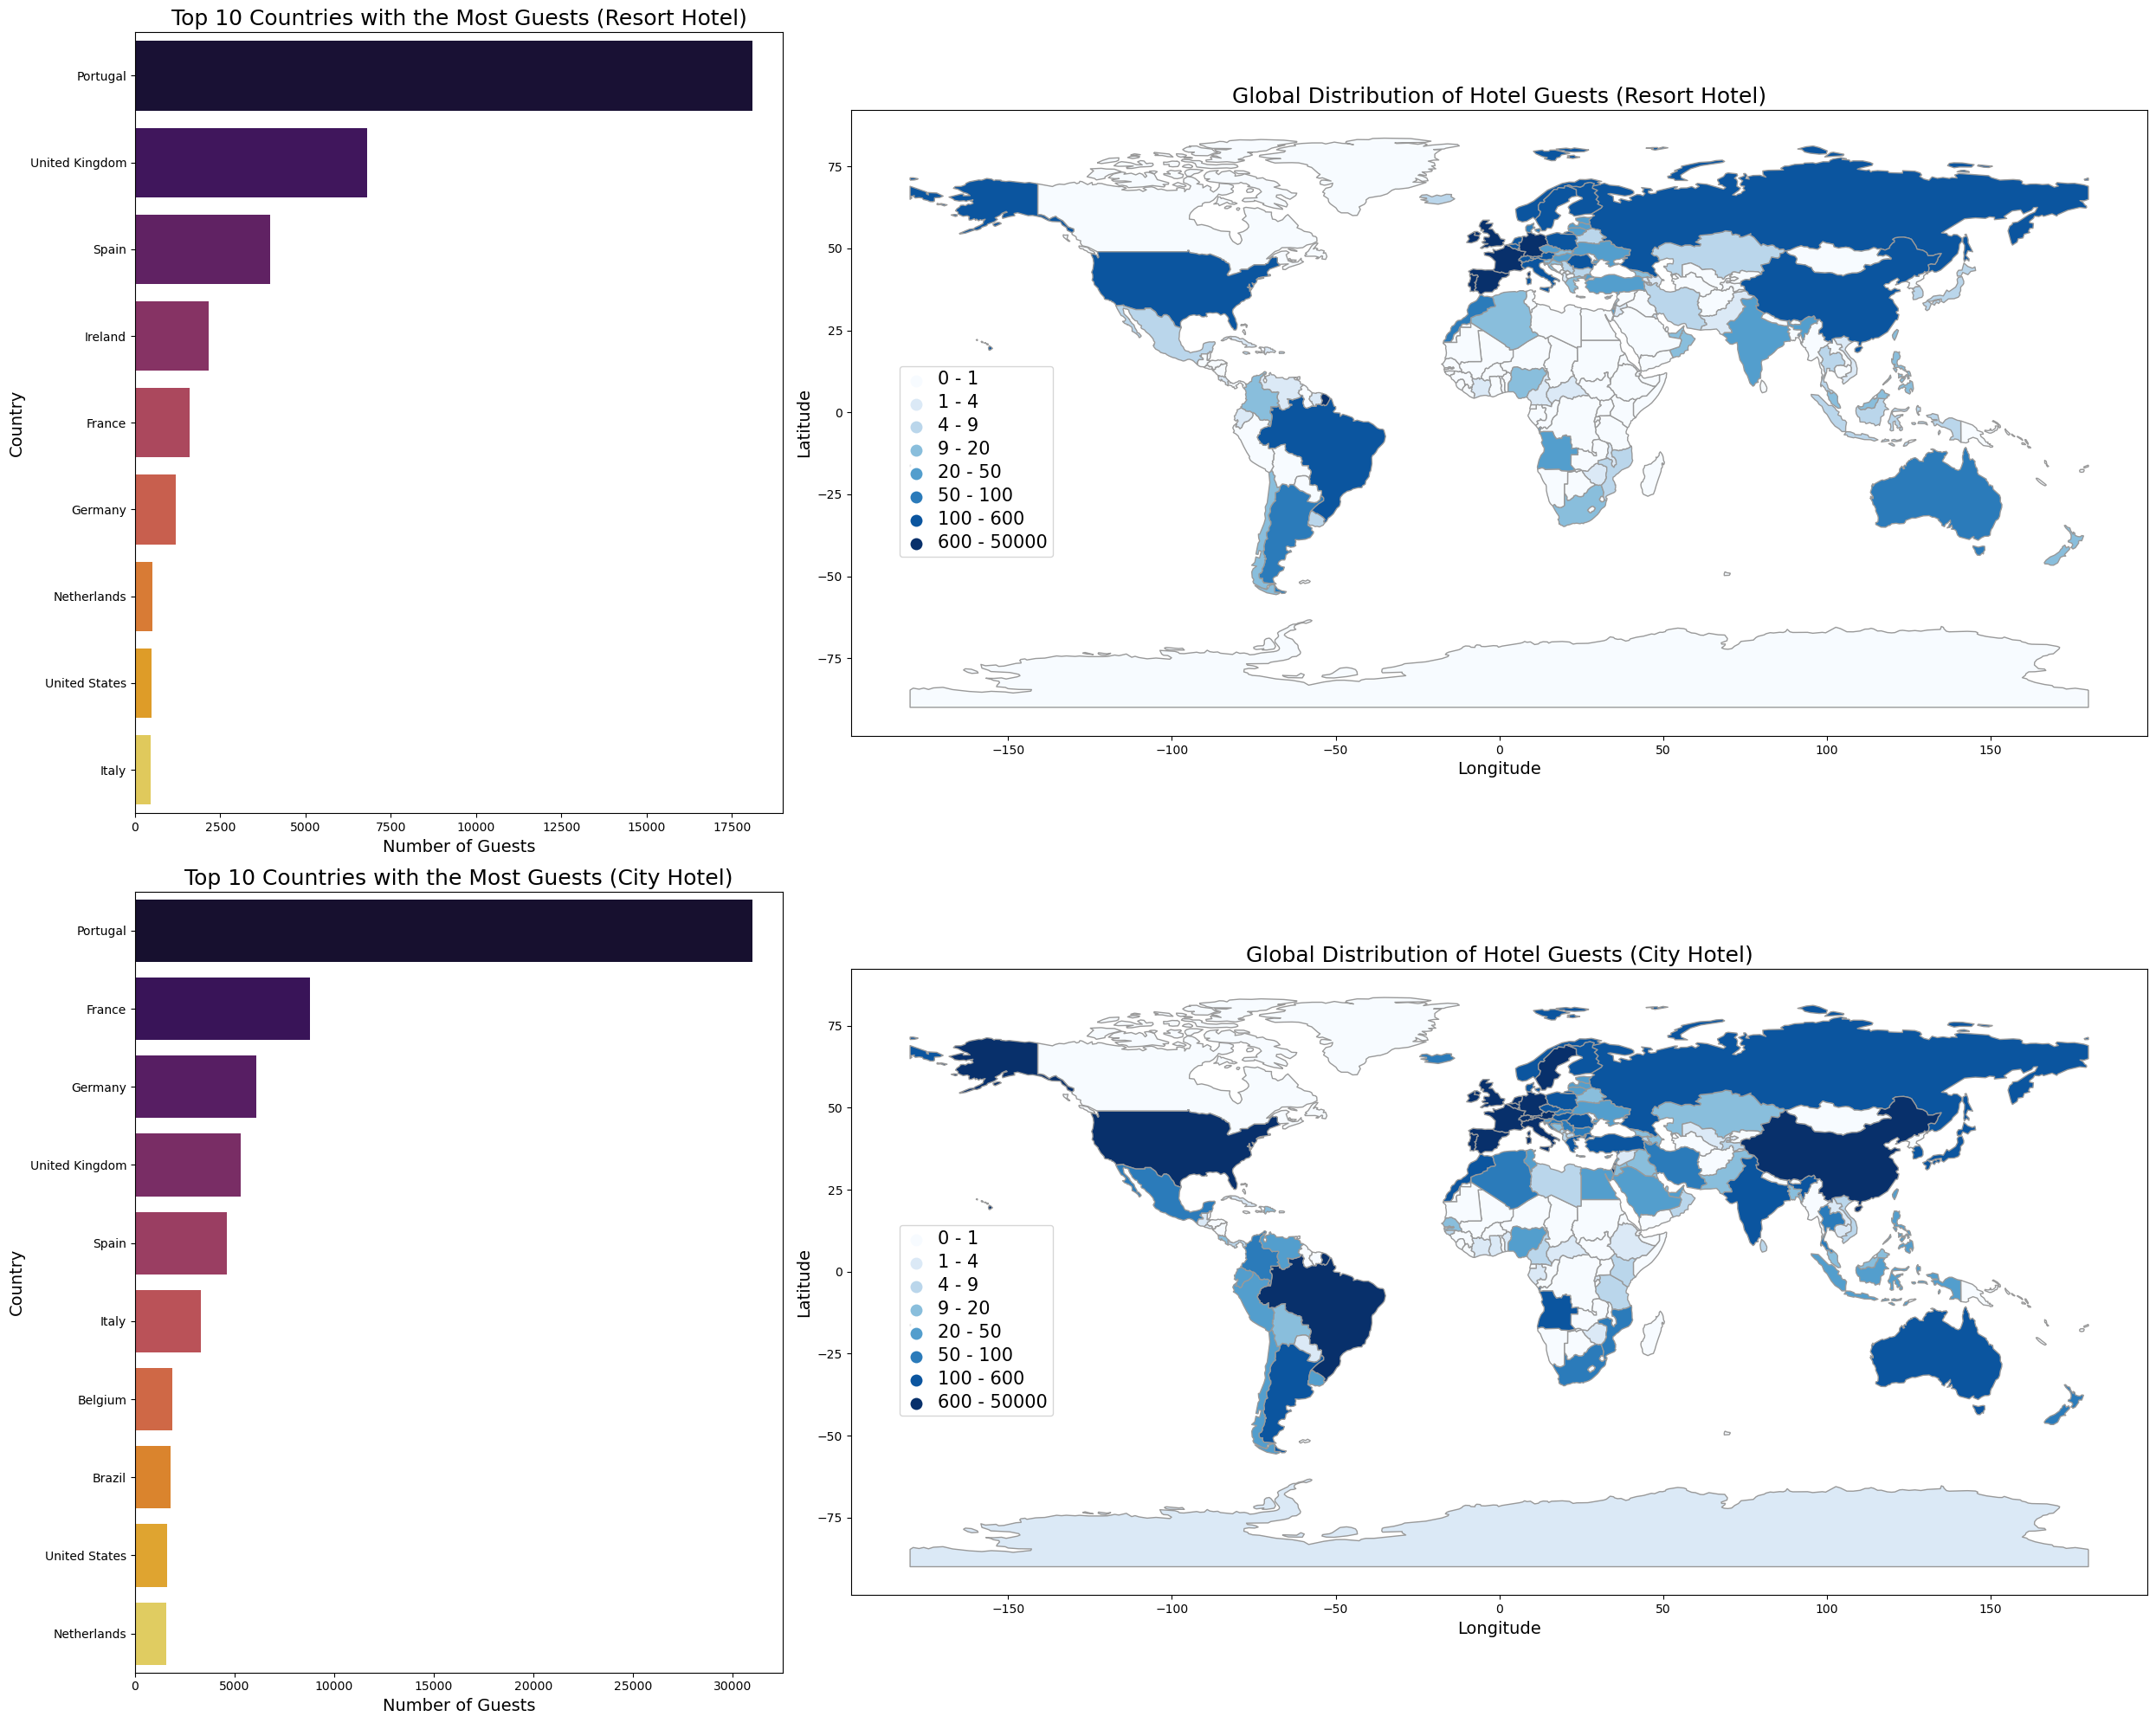




The global map visualisation below aids in identifying regions with high guest density, where **darker colour regions represent areas where more guests are coming from.** 
This provides insights into potential markets to help the hotels target into for future marketing campaigns or advertisements in a general and wider scope.



On top of that, we also provided an **overall analysis** of the hotel booking data for the **country with most guests coming from.** 
Based on the visualisations and lists below, it appears that **Portugal again emerges as the leading source of guests for both City Hotel and Resort Hotel.** 
The **top 10 countries contributing the most guests** are Portugal, the United Kingdom, France, Spain, Germany, Italy, Ireland, Belgium, the Netherlands, 
and the United States, highlighting that European countries are the primary markets.




Top 10 countries overall: 

  country  count    country_name
0     PRT  49078        Portugal
1     GBR  12129  United Kingdom
2     FRA  10415          France
3     ESP   8568           Spain
4     DEU   7287         Germany
5     ITA   3766           Italy
6     IRL   3375         Ireland
7     BEL   2342         Belgium
8     BRA   2224          Brazil
9     NLD   2104     Netherlands
Country with the most guests overall: Portugal with 49078 guests


C:\Users\User\AppData\Local\Temp\ipykernel_14452\160880919.py:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


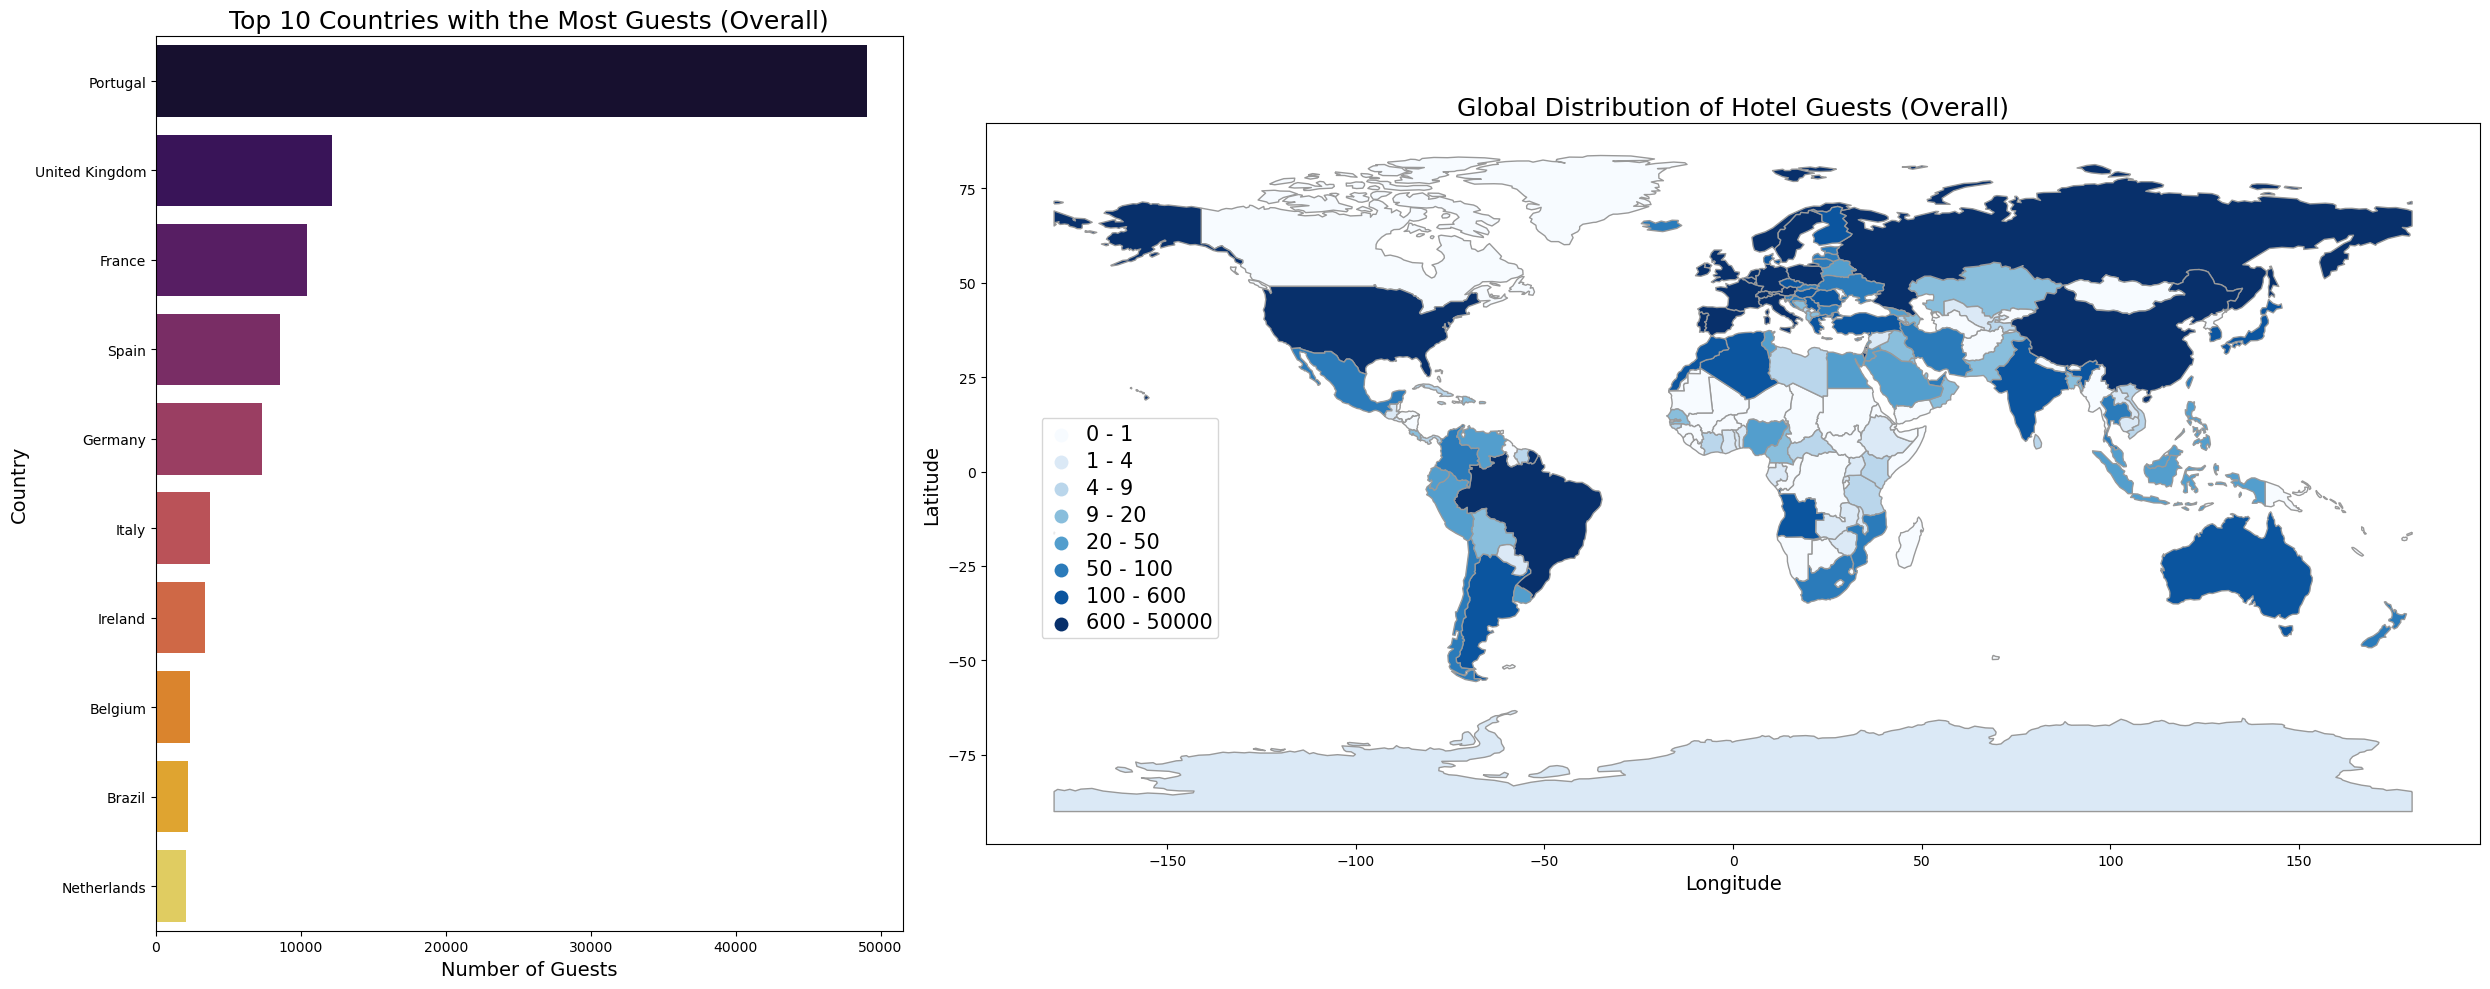




Besides, a **list of missing countries** in the dataset is also displayed in the code, 
indicating that these are the countries that are not visualised and analysed in our analysis due to the gaps in data collection.




Missing countries in the dataset for Resort Hotel (70):

Tanzania, United Republic of
Western Sahara
Canada
Papua New Guinea
Congo, The Democratic Republic of the
Somalia
Kenya
Sudan
Chad
Haiti
Falkland Islands (Malvinas)
Greenland
French Southern Territories
Timor-Leste
Lesotho
Bolivia, Plurinational State of
Panama
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Guyana
Namibia
Mali
Mauritania
Benin
Niger
Ghana
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Congo
Gabon
Equatorial Guinea
Eswatini
Palestine, State of
Gambia
Iraq
Vanuatu
Cambodia
Lao People's Democratic Republic
Myanmar
Korea, Democratic People's Republic of
Mongolia
Bangladesh
Bhutan
Afghanistan
Tajikistan
Kyrgyzstan
Turkmenistan
Moldova, Republic of
New Caledonia
Solomon Islands
Brunei Darussalam
Eritrea
Paraguay
Yemen
Antarctica
None
Libya
Ethiopia
None
Rwanda
Montenegro
None
Trinidad and Tobago
South Sudan

Missing countries in the dataset for City Hotel (45):

Fiji
Western Sahara
Canada
Papua New Guinea
Con

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import pycountry

# Function to get country name from country code
def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_3=country_code).name
    except AttributeError:
        return None

# Function to plot top 10 countries (bar)
def plot_top_countries(ax, country_counts, hotel_type):
    top_10_countries = country_counts.head(10)
    
    sns.barplot(ax=ax, x='count', y='country_name', data=top_10_countries, palette='inferno')
    ax.set_title(f'Top 10 Countries with the Most Guests ({hotel_type})', fontsize=18)
    ax.set_xlabel('Number of Guests', fontsize=14)
    ax.set_ylabel('Country', fontsize=14)

# Function to plot global map
def plot_global_map(ax, country_counts, hotel_type):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[['iso_a3', 'geometry']]

    # Simplify the geometries to avoid multi-part geometry issues
    world['geometry'] = world['geometry'].apply(lambda x: x.simplify(0.1) if x.geom_type == 'MultiPolygon' else x)

    # Merge the country counts with the world map
    merged = world.set_index('iso_a3').join(country_counts.set_index('country'))

    # Handle countries that are missing in the dataset
    missing_countries = merged[merged['count'].isna()].index

    # Convert missing country codes to country names
    missing_country_names = [get_country_name(code) for code in missing_countries]

    # Fill missing countries with 0 count
    merged['count'] = merged['count'].fillna(0)

    # Define custom bin edges
    bin_edges = [0, 1, 4, 9, 20, 50, 100, 600, 50000]
    labels = [f'{bin_edges[i]} - {bin_edges[i+1]}' for i in range(len(bin_edges)-1)]

    # Assign bin labels to the data
    merged['bin'] = pd.cut(merged['count'], bins=bin_edges, labels=labels, include_lowest=True)

    # Plotting the map with custom bins
    merged.plot(column='bin', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.6', legend=True)

    # Customize the legend position and size
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((0.16, 0.6))  # Adjusted position
    for text in legend.get_texts():
        text.set_fontsize(15)  # Adjust the font size as needed

    # Add axis labels
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

    ax.set_title(f'Global Distribution of Hotel Guests ({hotel_type})', fontsize=18)

    return missing_country_names

# Process each hotel type separately and print the top 10 list
missing_countries_per_hotel = {}

# Create subplots for bar plots and global maps side by side for each hotel type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 20), gridspec_kw={'width_ratios': [1, 2]})

text = """
\n\nBy looking at the **top 10 countries lists** below based on the analysis of hotel booking data, 
    we can observe that **the country that most guests come from for Resort Hotel** is: **Portugal**, having a count of 18094 guests, with **United Kingdom** and **Spain** following closely behind. 
    \nSimilarly for **City Hotel**, **Portugal remains the top source of guests** for the hotel with the highest count of 30984 guests, 
    with **France** and **Germany** also contributing significantly. 
    With this analysis, this indicates that **Portugal and most neighbouring European countries are the primary markets for both hotels**.\n
"""

display(Markdown(text))

for i, hotel_type in enumerate(df['hotel'].unique()):
    hotel_data = df[df['hotel'] == hotel_type]
    
    # Extract and count the occurrences of each country code
    country_counts = hotel_data['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'count']
    country_counts['country_name'] = country_counts['country'].apply(get_country_name)

    print(f"\nTop 10 countries for {hotel_type}: \n")
    print(country_counts.head(10))

    # Determine the country with the most guests
    top_country = country_counts.iloc[0]
    print(f"\nCountry with the most guests for {hotel_type}: {top_country['country_name']} with {top_country['count']} guests\n")

    # Plot top 10 countries
    plot_top_countries(axes[i, 0], country_counts, hotel_type)

    # Plot global map
    missing_countries = plot_global_map(axes[i, 1], country_counts, hotel_type)
    missing_countries_per_hotel[hotel_type] = missing_countries

plt.tight_layout()
plt.show()

# Combined analysis for the total dataset
combined_country_counts = df['country'].value_counts().reset_index()
combined_country_counts.columns = ['country', 'count']
combined_country_counts['country_name'] = combined_country_counts['country'].apply(get_country_name)


text = """
\n\nThe global map visualisation below aids in identifying regions with high guest density, where **darker colour regions represent areas where more guests are coming from.** 
This provides insights into potential markets to help the hotels target into for future marketing campaigns or advertisements in a general and wider scope.

\n\nOn top of that, we also provided an **overall analysis** of the hotel booking data for the **country with most guests coming from.** 
Based on the visualisations and lists below, it appears that **Portugal again emerges as the leading source of guests for both City Hotel and Resort Hotel.** 
The **top 10 countries contributing the most guests** are Portugal, the United Kingdom, France, Spain, Germany, Italy, Ireland, Belgium, the Netherlands, 
and the United States, highlighting that European countries are the primary markets.\n
"""

display(Markdown(text))

print("\nTop 10 countries overall: \n")
print(combined_country_counts.head(10))

# Determine the country with the most guests overall
top_country_overall = combined_country_counts.iloc[0]
print(f"Country with the most guests overall: {top_country_overall['country_name']} with {top_country_overall['count']} guests")

# Create subplots for the overall bar plot and global map side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10), gridspec_kw={'width_ratios': [1, 2]})

# Plot top 10 countries for the total dataset
plot_top_countries(axes[0], combined_country_counts, "Overall")

# Plot global map for the total dataset
missing_countries_overall = plot_global_map(axes[1], combined_country_counts, "Overall")

plt.tight_layout()
plt.show()

text = """
\n\nBesides, a **list of missing countries** in the dataset is also displayed in the code, 
indicating that these are the countries that are not visualised and analysed in our analysis due to the gaps in data collection.\n
"""

display(Markdown(text))

# Print missing countries for each hotel
for hotel_type, missing_countries in missing_countries_per_hotel.items():
    print(f"\nMissing countries in the dataset for {hotel_type} ({len(missing_countries)}):\n")
    for country in missing_countries:
        print(country)

# Print missing countries for the overall dataset
print(f"\nMissing countries in the overall dataset ({len(missing_countries_overall)}):\n")
for country in missing_countries_overall:
    print(country)


#### 2.2.6: How Long People Stay in the hotel?

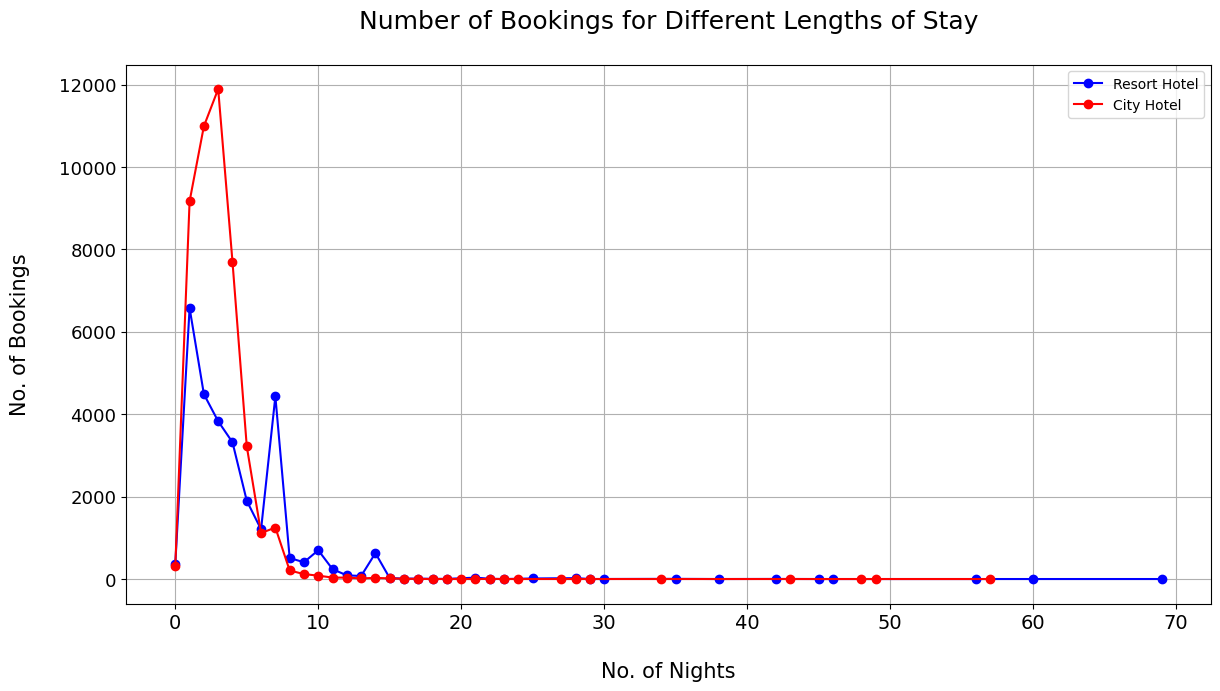




From the line plot above that describes the number of bookings for different lengths of stay, **we observe a significant skew to the left**:
- There is a low variation on the right; the right side of the plot is relatively flat.
- This flatness suggests that the number of bookings does not change significantly beyond a certain length of stay.
- The lack of variation in bookings for longer stays implies that these data points do not provide additional insights into booking patterns.
- Hence, to better understand booking trends, **we focus our analysis on stays of 15 days or fewer, where the data is more informative**.



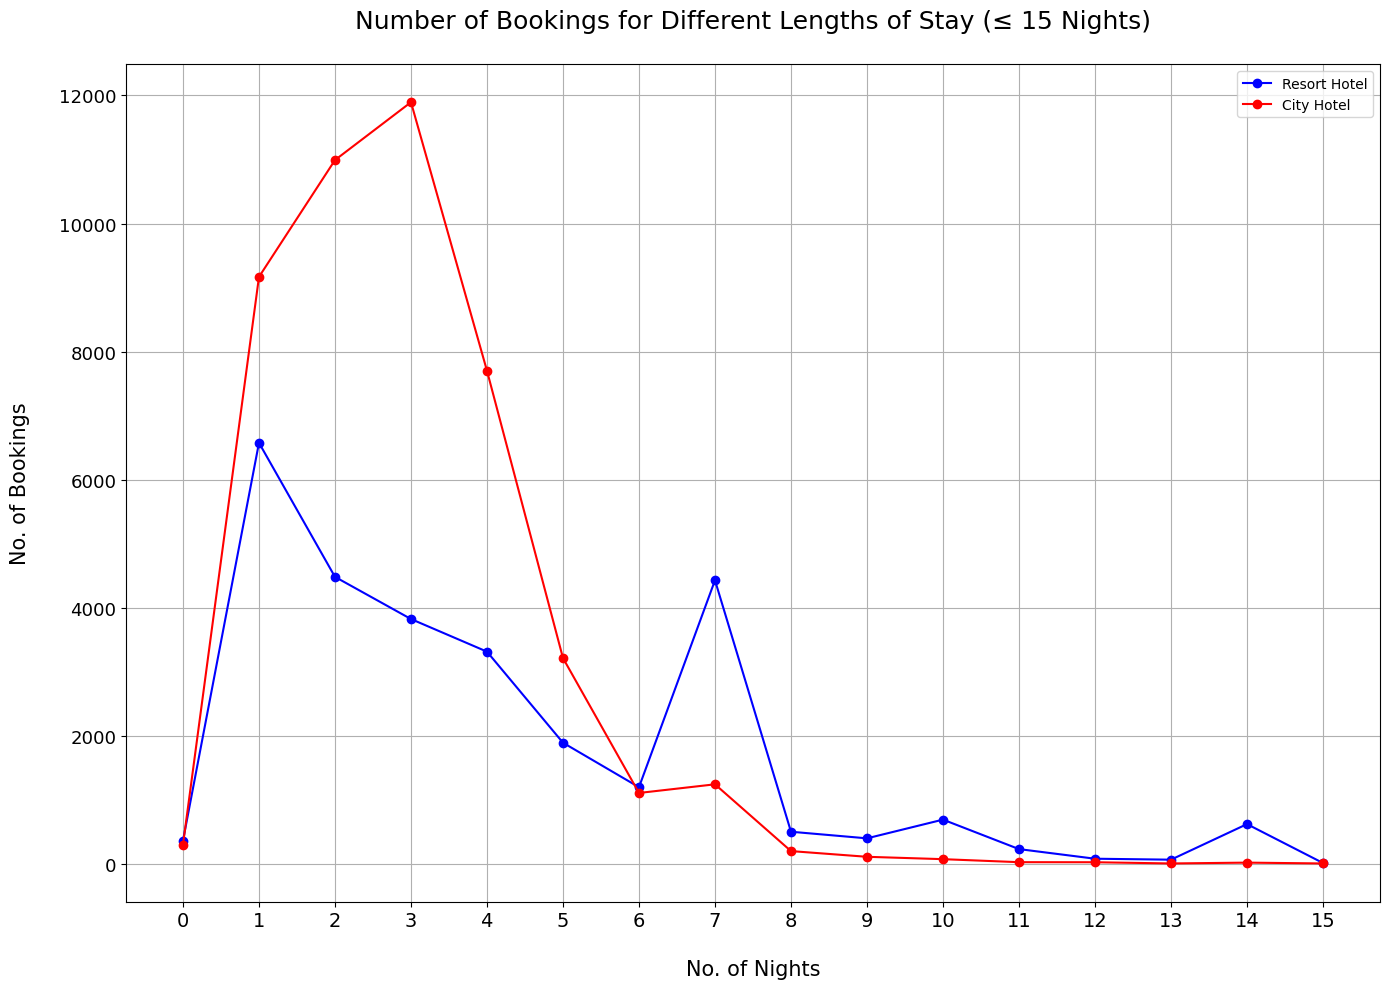




Below is the list of number of bookings for each length of stay sorted by number of nights: 


+-----------------+-------------------------+-----------------------+
|   No. of nights |   Resort Hotel Bookings |   City Hotel Bookings |
+=================+=========================+=======================+
|               0 |                     372 |                   308 |
+-----------------+-------------------------+-----------------------+
|               1 |                    6580 |                  9169 |
+-----------------+-------------------------+-----------------------+
|               2 |                    4488 |                 10992 |
+-----------------+-------------------------+-----------------------+
|               3 |                    3830 |                 11895 |
+-----------------+-------------------------+-----------------------+
|               4 |                    3321 |                  7704 |
+-----------------+-------------------------+-----------------------+
|               5 |                    1900 |                  3221 |
+-----------------+-

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Filter out cancelled bookings
df_successful = df[df['is_canceled'] == 0].copy()

# Calculate total length of stay (total nights)
df_successful['total_nights'] = df_successful['stays_in_weekend_nights'] + df_successful['stays_in_week_nights']

# Filter data for Resort Hotel and City Hotel
resort_hotel = df_successful[df_successful['hotel'] == 'Resort Hotel']
city_hotel = df_successful[df_successful['hotel'] == 'City Hotel']

# Get the count of bookings for each length of stay
resort_nights_count = resort_hotel['total_nights'].value_counts().sort_index()
city_nights_count = city_hotel['total_nights'].value_counts().sort_index()

# Create DataFrames for plotting
resort_data = pd.DataFrame({
    'No. of nights': resort_nights_count.index,
    'No. of bookings': resort_nights_count.values
})

city_data = pd.DataFrame({
    'No. of nights': city_nights_count.index,
    'No. of bookings': city_nights_count.values
})

# Plot both line plots on a single figure
plt.figure(figsize=(14, 7))
plt.plot(resort_data['No. of nights'], resort_data['No. of bookings'], marker='o', linestyle='-', color='blue', label='Resort Hotel')
plt.plot(city_data['No. of nights'], city_data['No. of bookings'], marker='o', linestyle='-', color='red', label='City Hotel')
plt.title('Number of Bookings for Different Lengths of Stay\n', fontsize = 18)
plt.xlabel('\nNo. of Nights', fontsize = 15)
plt.ylabel('No. of Bookings\n', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 13)
plt.grid()
plt.legend()
plt.show()

print()
text = """
\n\nFrom the line plot above that describes the number of bookings for different lengths of stay, **we observe a significant skew to the left**:
- There is a low variation on the right; the right side of the plot is relatively flat.
- This flatness suggests that the number of bookings does not change significantly beyond a certain length of stay.
- The lack of variation in bookings for longer stays implies that these data points do not provide additional insights into booking patterns.
- Hence, to better understand booking trends, **we focus our analysis on stays of 15 days or fewer, where the data is more informative**.\n
"""

display(Markdown(text))
print()

# Filter for stays of 15 nights or fewer
resort_hotel_15 = resort_hotel[resort_hotel['total_nights'] <= 15]
city_hotel_15 = city_hotel[city_hotel['total_nights'] <= 15]

# Get the count of bookings for each length of stay (≤ 15 nights)
resort_nights_count_15 = resort_hotel_15['total_nights'].value_counts().sort_index()
city_nights_count_15 = city_hotel_15['total_nights'].value_counts().sort_index()

# Create DataFrames for plotting
resort_data_15 = pd.DataFrame({
    'No. of nights': resort_nights_count_15.index,
    'No. of bookings': resort_nights_count_15.values
})

city_data_15 = pd.DataFrame({
    'No. of nights': city_nights_count_15.index,
    'No. of bookings': city_nights_count_15.values
})

# Create a single plot with overlapping lines
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(resort_data_15['No. of nights'], resort_data_15['No. of bookings'], marker='o', color='blue', label='Resort Hotel')
ax.plot(city_data_15['No. of nights'], city_data_15['No. of bookings'], marker='o', color='red', label='City Hotel')

ax.set_title('Number of Bookings for Different Lengths of Stay (≤ 15 Nights)\n', fontsize = 18)
ax.set_xlabel('\nNo. of Nights', fontsize = 15)
ax.set_ylabel('No. of Bookings\n', fontsize = 15)
plt.xticks(range(16), fontsize = 14)
plt.yticks(fontsize = 13)
ax.grid()
ax.legend()
plt.tight_layout()
plt.show()

print()
text = """
\n\nBelow is the list of number of bookings for each length of stay sorted by number of nights: 
"""

display(Markdown(text))

# Create DataFrames for the number of bookings
df_resort = resort_nights_count.reset_index()
df_resort.columns = ['No. of nights', 'Resort Hotel Bookings']

df_city = city_nights_count.reset_index()
df_city.columns = ['No. of nights', 'City Hotel Bookings']

# Merge DataFrames
df_combined = pd.merge(df_resort, df_city, on='No. of nights', how='outer').fillna(0)

# Convert booking counts to integers
df_combined['Resort Hotel Bookings'] = df_combined['Resort Hotel Bookings'].astype(int)
df_combined['City Hotel Bookings'] = df_combined['City Hotel Bookings'].astype(int)

# Sort by 'No. of nights'
df_combined.sort_values(by='No. of nights', inplace=True)

# Print the combined DataFrame using tabulate
print(tabulate(df_combined, headers='keys', tablefmt='grid', showindex=False))

**Analysis:** <br>

The analysis of the length of stay at the two types of hotels reveals distinct patterns in booking behaviour. From the line plot showing the number of bookings for different lengths of stay (up to 15 nights), it is evident that guests at City Hotel tend to book shorter stays compared to those at Resort Hotel. The peak for City Hotel (red line) occurs at 3 nights, with nearly 12,000 bookings, followed closely by 2-night stays with around 11,000 bookings. On the other hand, the peak for Resort Hotel (blue line) is at 1 night, with approximately 6,500 bookings. Beyond these durations of 1 to 3 nights, the number of bookings drops significantly, indicating that guests lose interest in longer stays at both types of hotels.

We can also conclude that 3 nights is the ideal duration for people to travel in a city, leading them to choose City Hotels for such a stay. In contrast, the ideal duration for people to stay in a resort is 1 night, likely influenced by the higher cost of Resort Hotels compared to City Hotels. Although this price difference is subjective, it explains why most people opt for a 1-night stay in Resort Hotels. However, if guests have a larger budget, they are more likely to choose a week-long stay in a Resort Hotel.


#### 2.2.7 Which was the most booked accommodation type (Single, Couple, Family)?

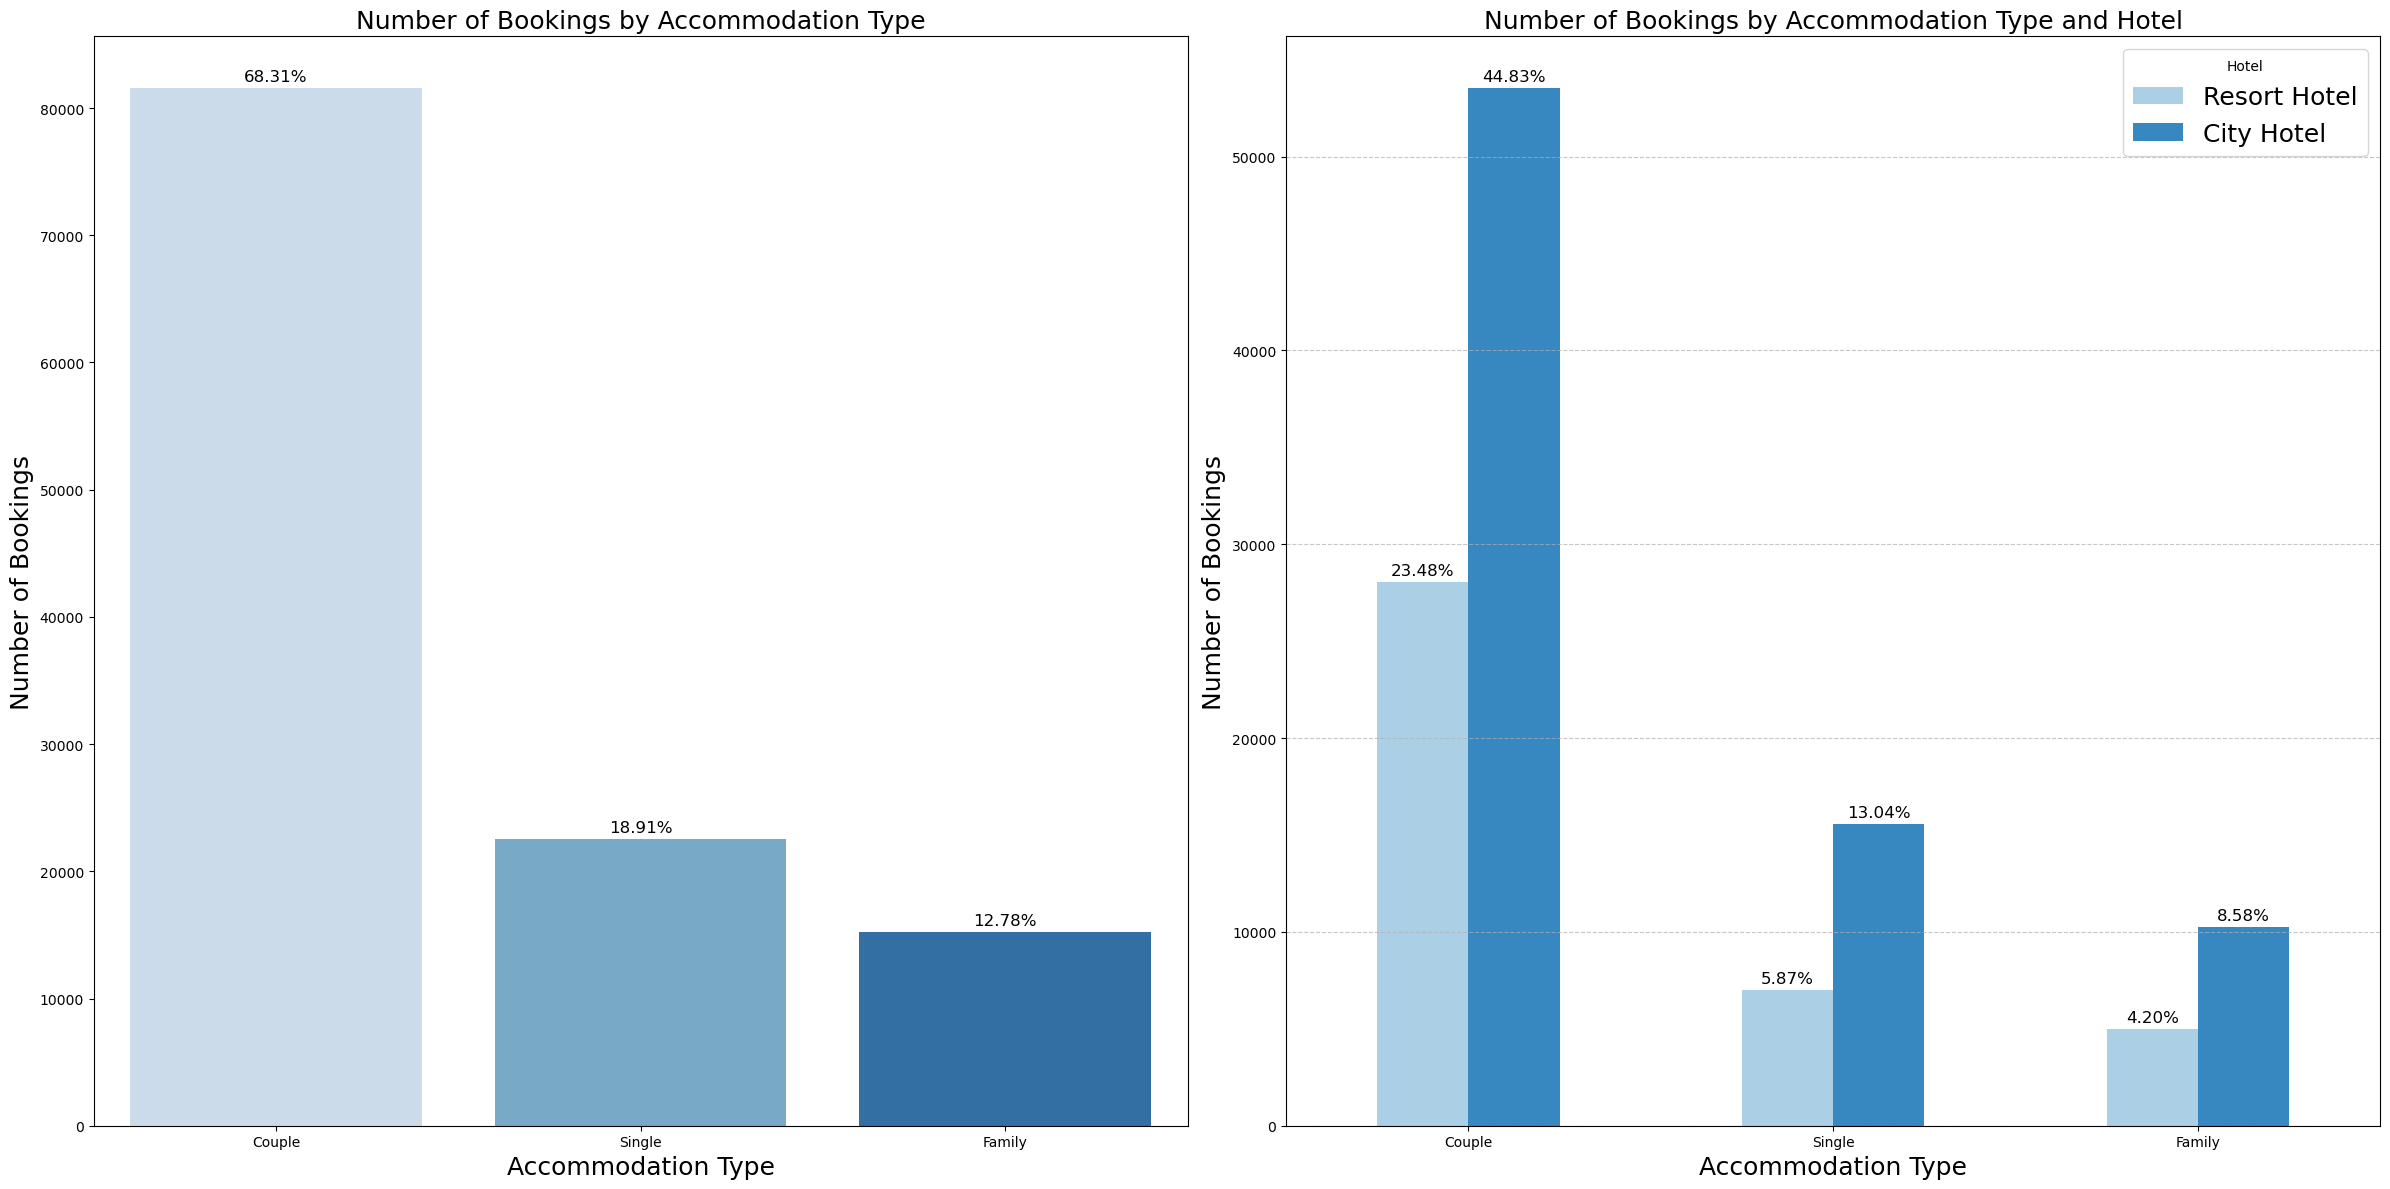

Most Booked Accommodation Type: Couple
Most Booked Accommodation Type for City Hotel: Couple
Most Booked Accommodation Type for Resort Hotel: Couple


In [62]:
# Define the accommodation_type function
def accommodation_type(row):
    if row['adults'] == 1 and row['children'] == 0 and row['babies'] == 0:
        return 'Single'
    elif row['adults'] == 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Couple'
    else:
        return 'Family'

# Create the 'accommodation_type' column
df['accommodation_type'] = df.apply(accommodation_type, axis=1)

# Separate data for City Hotel and Resort Hotel
city_hotel = df[df['hotel'] == 'City Hotel']
resort_hotel = df[df['hotel'] == 'Resort Hotel']

# Calculate the most booked accommodation type for City Hotel
city_accommodation_counts = city_hotel['accommodation_type'].value_counts()
most_booked_city_type = city_accommodation_counts.idxmax()

# Calculate the most booked accommodation type for Resort Hotel
resort_accommodation_counts = resort_hotel['accommodation_type'].value_counts()
most_booked_resort_type = resort_accommodation_counts.idxmax()

# Overall hotel
overall_booked_hotel = city_accommodation_counts.add(resort_accommodation_counts, fill_value=0)
most_booked_hotel_type = overall_booked_hotel.idxmax()

# Data visualization
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plotting the overall bar chart
ax0 = sns.barplot(x=overall_booked_hotel.index, y=overall_booked_hotel.values, palette='Blues', ax=axes[0])
axes[0].set_xlabel('Accommodation Type', fontsize = 18)
axes[0].set_ylabel('Number of Bookings', fontsize = 18)
axes[0].set_title('Number of Bookings by Accommodation Type', fontsize = 18)

# Add percentage on top of each bar for the overall bookings
total_overall = overall_booked_hotel.sum()
for p in ax0.patches:
    percentage = f'{(p.get_height() / total_overall) * 100:.2f}%'
    ax0.annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Combine the counts into a single DataFrame for plotting
accommodation_counts = pd.DataFrame({
    'Resort Hotel': resort_accommodation_counts,
    'City Hotel': city_accommodation_counts
}).fillna(0)

# Calculate overall percentages for each accommodation type
overall_percentages = (overall_booked_hotel / total_overall) * 100

# Plotting the grouped bar chart
ax1 = accommodation_counts.plot(kind='bar', color = sns.color_palette('Blues', n_colors=len(accommodation_counts.columns)), ax=axes[1])
axes[1].set_xlabel('Accommodation Type', fontsize = 18)
axes[1].set_ylabel('Number of Bookings', fontsize = 18)
axes[1].set_title('Number of Bookings by Accommodation Type and Hotel', fontsize = 18)
axes[1].set_xticks(range(len(accommodation_counts.index)))
axes[1].set_xticklabels(accommodation_counts.index, rotation=0)
axes[1].legend(title='Hotel', fontsize = 18)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage on top of each bar for grouped bar chart
for i, bar in enumerate(ax1.patches):
    # Determine which hotel the bar belongs to
    hotel = 'Resort Hotel' if i % 2 == 0 else 'City Hotel'
    
    # Get the count for the current bar
    count = bar.get_height()
    
    # Determine the total for the combined bars of the same accommodation type
    accommodation_type = accommodation_counts.index[int(i / 2)]
    combined_total = overall_booked_hotel.loc[accommodation_type]
    
    # Calculate the percentage for the current bar relative to the combined total
    percentage = (count / combined_total) * overall_percentages[accommodation_type]
    
    # Annotate the bar with the percentage
    ax1.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#print result
print(f'Most Booked Accommodation Type: {most_booked_hotel_type}')
print(f'Most Booked Accommodation Type for City Hotel: {most_booked_city_type}')
print(f'Most Booked Accommodation Type for Resort Hotel: {most_booked_resort_type}')

**Analysis:**


The left chart clearly illustrates the total number of bookings for each accommodation type without differentiating between hotel categories. From the graphs, we can analyse the Couples dominate with 68.31% of the total bookings, as indicated by the left most bar. This percentage is much higher than the other categories, suggesting most people prefer accommodations suited for couples. In contrast, the Singles type for 18.91% of the bookings represented by a middle bar, while the Families type makes up just 12.78% shown by the smallest right most bar. This chart conclusively shows that the Couple accommodation type is the most popular choice among all the options. 

The right chart provides a detailed breakdown of the bookings by accommodation type and hotel type, distinguishing between Resort Hotels and City Hotels. Even with this division, the preference for the Couple category remains evident. For City Hotels, Couples make up 44.83% of the bookings, and for Resort Hotels, they have 23.83%. This combined total significantly surpasses the percentages for both Singles and Families in either hotel type. Single has 13.04% of bookings in City Hotels and 5.87% in Resort Hotels. Families trail further behind, with 8.51% in City Hotels and 4.20% in Resort Hotels. These numbers conclude that Couples are the most frequent guests across both hotel types.


In conclusion, the Couple accommodation type is the most booked. As we analyse, whether we look at the overall booking trends or the specific preferences in different types of hotels, Couples emerge as the most popular accommodation type. 



## 3.0  Data Pre-processing

In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

### 3.1: Feature Engineering
**Create new columns:  total_guests**

In [64]:
# Calculate total_guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Display the first few rows to verify the new columns
df[['adults', 'children', 'babies', 'total_guests']]

,adults,children,babies,total_guests
0,2,0,0,2
1,2,0,0,2
2,1,0,0,1
3,1,0,0,1
4,2,0,0,2
...,...,...,...,...
119385,2,0,0,2
119386,3,0,0,3
119387,2,0,0,2
119388,2,0,0,2


It can be observed that the values in the new column are exactly the sum of values from the combined columns, thus the column **‘total_guests’** with new features is successfully created, helping us to reduce unnecessary and overlapping features in the dataset

##### Drop the unnecessary features
We will also delete the combined and unnecesarry features in our dataset by using the ‘drop’ function

In [65]:
columns_to_drop = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'arrival_date', 'accommodation_type']
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


### 3.2 Data transformation
Identify and display categorical columns before transformation

In [66]:
# Identify categorical columns
categorical_features = df.select_dtypes(include=['object', 'datetime64[ns]']).columns.tolist()

# Display categorical columns and their unique values count
categorical_summary = {col: df[col].nunique() for col in categorical_features}
categorical_summary

{'hotel': 2,
 'arrival_date_month': 12,
 'meal': 5,
 'country': 177,
 'market_segment': 8,
 'distribution_channel': 5,
 'reserved_room_type': 10,
 'assigned_room_type': 12,
 'deposit_type': 3,
 'customer_type': 4,
 'reservation_status': 3,
 'reservation_status_date': 926}

Transform categorical features to numerical values using **label encoding**

In [67]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

    # Print the mapping of categorical values to numerical values
    print(f"Mapping for column '{col}':")
    for class_index, class_label in enumerate(le.classes_):
        print(f"{class_label}: {class_index}")
    print("\n")

# Display the first few rows of the transformed data
df.head()

Mapping for column 'hotel':
City Hotel: 0
Resort Hotel: 1


Mapping for column 'arrival_date_month':
April: 0
August: 1
December: 2
February: 3
January: 4
July: 5
June: 6
March: 7
May: 8
November: 9
October: 10
September: 11


Mapping for column 'meal':
BB: 0
FB: 1
HB: 2
SC: 3
Undefined: 4


Mapping for column 'country':
ABW: 0
AGO: 1
AIA: 2
ALB: 3
AND: 4
ARE: 5
ARG: 6
ARM: 7
ASM: 8
ATA: 9
ATF: 10
AUS: 11
AUT: 12
AZE: 13
BDI: 14
BEL: 15
BEN: 16
BFA: 17
BGD: 18
BGR: 19
BHR: 20
BHS: 21
BIH: 22
BLR: 23
BOL: 24
BRA: 25
BRB: 26
BWA: 27
CAF: 28
CHE: 29
CHL: 30
CHN: 31
CIV: 32
CMR: 33
CN: 34
COL: 35
COM: 36
CPV: 37
CRI: 38
CUB: 39
CYM: 40
CYP: 41
CZE: 42
DEU: 43
DJI: 44
DMA: 45
DNK: 46
DOM: 47
DZA: 48
ECU: 49
EGY: 50
ESP: 51
EST: 52
ETH: 53
FIN: 54
FJI: 55
FRA: 56
FRO: 57
GAB: 58
GBR: 59
GEO: 60
GGY: 61
GHA: 62
GIB: 63
GLP: 64
GNB: 65
GRC: 66
GTM: 67
GUY: 68
HKG: 69
HND: 70
HRV: 71
HUN: 72
IDN: 73
IMN: 74
IND: 75
IRL: 76
IRN: 77
IRQ: 78
ISL: 79
ISR: 80
ITA: 81
JAM: 82
JEY: 83
JOR: 84
JPN: 85


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
0,1,0,342,2015,5,27,1,0,135,3,...,0,0,2,0.0,0,0,1,121,0,2
1,1,0,737,2015,5,27,1,0,135,3,...,0,0,2,0.0,0,0,1,121,0,2
2,1,0,7,2015,5,27,1,0,59,3,...,0,0,2,75.0,0,0,1,122,1,1
3,1,0,13,2015,5,27,1,0,59,2,...,0,0,2,75.0,0,0,1,122,1,1
4,1,0,14,2015,5,27,1,0,59,6,...,0,0,2,98.0,0,1,1,123,2,2


### 3.3 Data selection

Calculate correlation coefficients with the target variable 'is_canceled' to decide which attribute should be selected

In [68]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['is_canceled'].sort_values(ascending=False)

# Display the correlation of each feature with 'is_canceled'
correlation_with_target

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
distribution_channel              0.167600
previous_cancellations            0.110133
market_segment                    0.059338
days_in_waiting_list              0.054186
adr                               0.047557
total_guests                      0.046522
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_month               -0.001491
arrival_date_day_of_month        -0.006130
meal                             -0.017678
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
customer_type                    -0.068140
is_repeated_guest                -0.084793
hotel                            -0.136531
booking_changes                  -0.144381
reservation_status_date          -0.162135
assigned_ro

**Visualize the correlation of features with 'is_canceled'**

This visualization step creates a bar plot of the correlation coefficients, making it easier to visually determine which features have strong or weak correlations with the cancellation status.

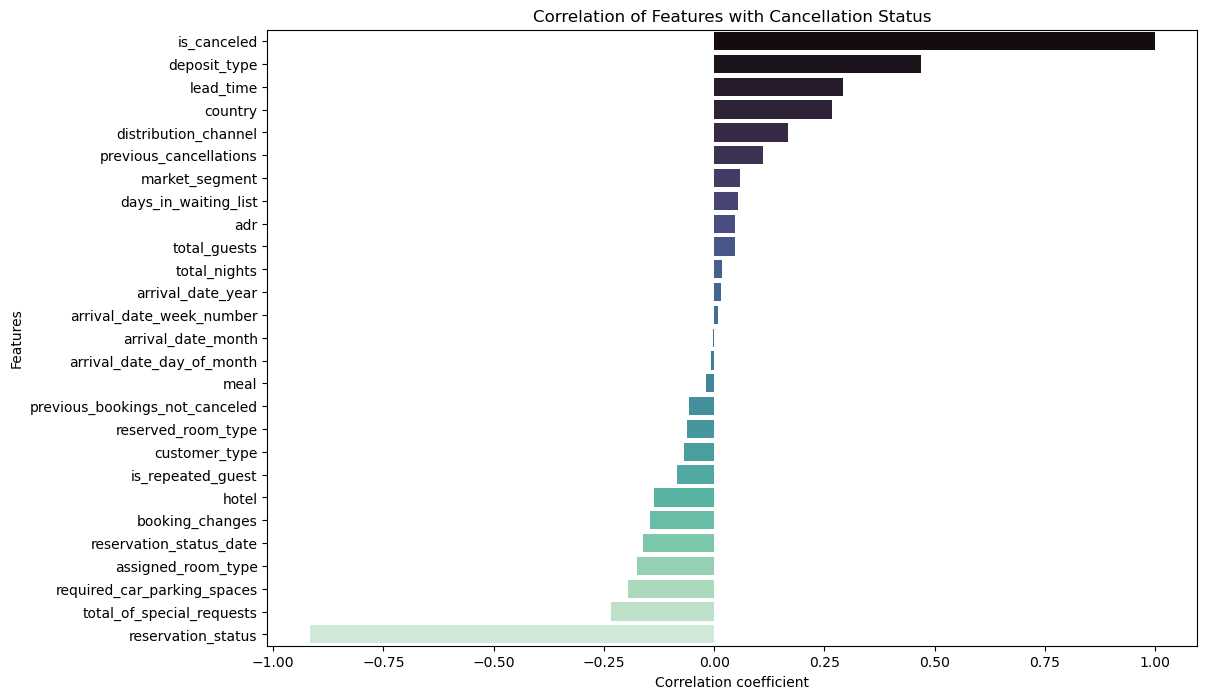

In [71]:
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='mako')
plt.title('Correlation of Features with Cancellation Status')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

**Select features with significant correlation**

Here, we consider |correlation| > 0.01 as significant.
The target variable is_canceled is also removed from this list.

In [73]:
significant_features = correlation_with_target[abs(correlation_with_target) > 0.01].index.tolist()

# Remove the target variable 'is_canceled' from the list of features
significant_features.remove('is_canceled')
significant_features.remove('reservation_status')

# Display the significant features
significant_features

['deposit_type',
 'lead_time',
 'country',
 'distribution_channel',
 'previous_cancellations',
 'market_segment',
 'days_in_waiting_list',
 'adr',
 'total_guests',
 'total_nights',
 'arrival_date_year',
 'meal',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'customer_type',
 'is_repeated_guest',
 'hotel',
 'booking_changes',
 'reservation_status_date',
 'assigned_room_type',
 'required_car_parking_spaces',
 'total_of_special_requests']

**Create a new dataframe with significant features to store it**

In [74]:
data_selected = df[significant_features]
target= df['is_canceled']
# Display the selected data
data_selected

,deposit_type,lead_time,country,distribution_channel,previous_cancellations,market_segment,days_in_waiting_list,adr,total_guests,total_nights,...,previous_bookings_not_canceled,reserved_room_type,customer_type,is_repeated_guest,hotel,booking_changes,reservation_status_date,assigned_room_type,required_car_parking_spaces,total_of_special_requests
0,0,342,135,1,0,3,0,0.00,2,0,...,0,2,2,0,1,3,121,2,0,0
1,0,737,135,1,0,3,0,0.00,2,0,...,0,2,2,0,1,4,121,2,0,0
2,0,7,59,1,0,3,0,75.00,1,1,...,0,0,2,0,1,0,122,2,0,0
3,0,13,59,0,0,2,0,75.00,1,1,...,0,0,2,0,1,0,122,0,0,0
4,0,14,59,3,0,6,0,98.00,2,2,...,0,0,2,0,1,0,123,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,15,3,0,5,0,96.14,2,7,...,0,0,2,0,0,0,919,0,0,0
119386,0,102,56,3,0,6,0,225.43,3,7,...,0,4,2,0,0,0,920,4,0,2
119387,0,34,43,3,0,6,0,157.71,2,7,...,0,3,2,0,0,0,920,3,0,4
119388,0,109,59,3,0,6,0,104.40,2,7,...,0,0,2,0,0,0,920,0,0,0


Visualise the correlation coefficient between the selected features to have a better understanding of their relationship

<Axes: >

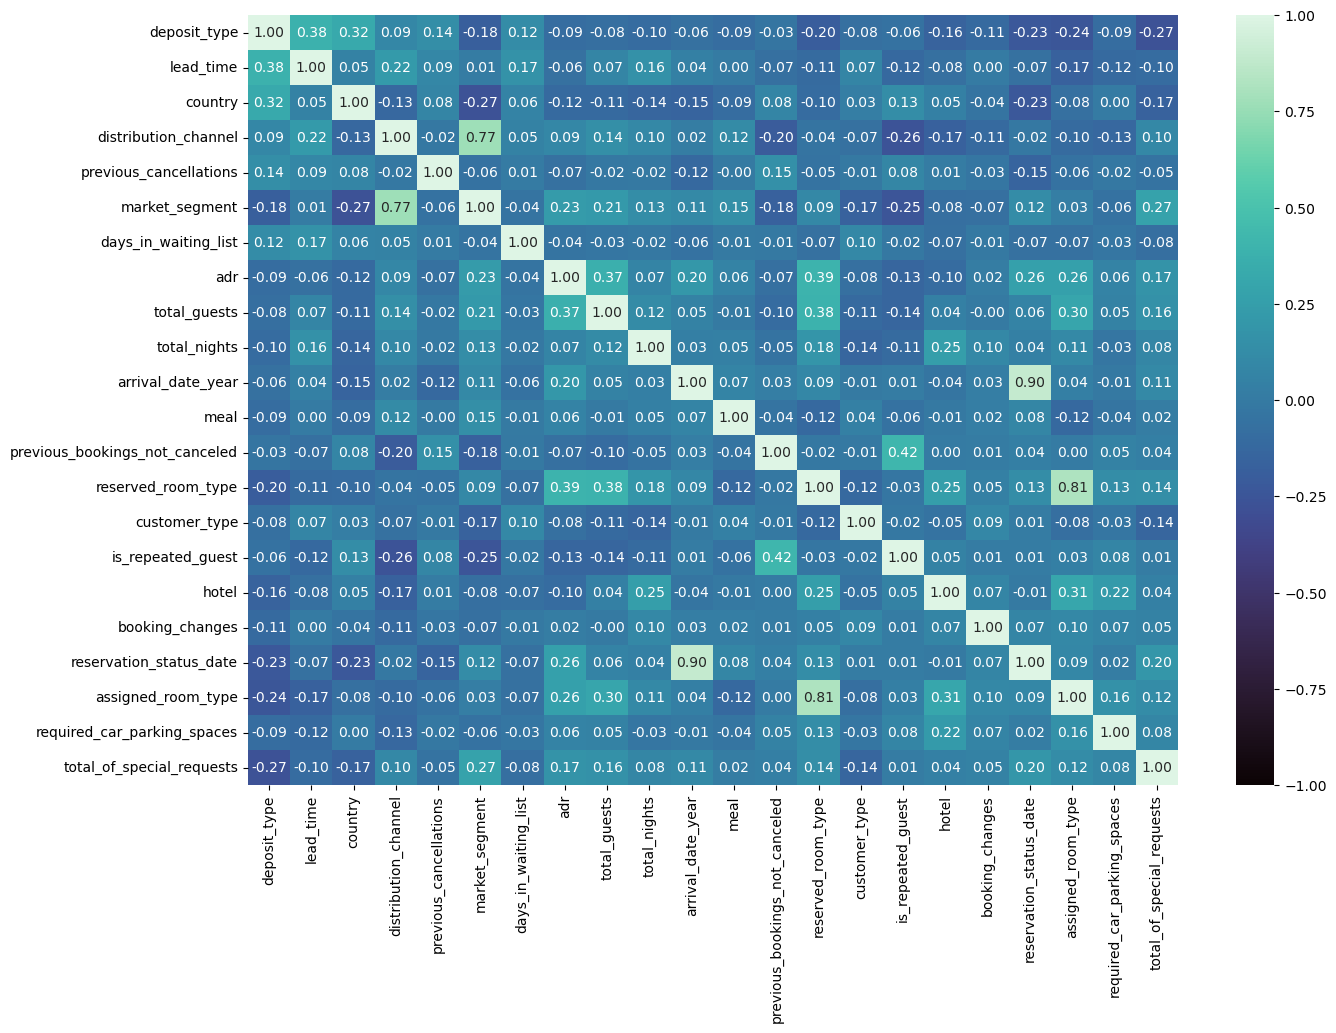

In [88]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_selected.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",  cmap="mako")

### 3.4: Split the data

We are consider 30% of the dataset will be used for testing, and the remaining 70% will be used for training.

In [24]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_selected, target, test_size=0.3, random_state=42)

# Print the shapes of the resulting splits
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")

Training feature set shape: (83573, 22)
Testing feature set shape: (35817, 22)
Training target set shape: (83573,)
Testing target set shape: (35817,)


**Explanation:**

| **Component** | **Explanation** |
|:-------------|:--------------------------------------------|
| **x_train**  | The training set of features, which is 70% of the original data (based on the `test_size`=0.3 parameter). This subset is used to train the machine learning model. Thus, we have 83,573 rows as our training set. |
| **x_test**   | The testing set of features, which is 30% of the original data. This subset is used to evaluate the performance of the model on unseen data. Thus, we have 35,871 rows as our testing set. |
| **y_train**  | The training set of target values, corresponding to `x_train`. These are the actual cancellation statuses used to train the model. |
| **y_test**   | The testing set of target values, corresponding to `x_test`. These are the actual cancellation statuses used to evaluate the model's predictions. |


## 4.0 Model Development

### 4.1 The Selected of Machine Learning Algorithm is:

1. Random Forest Algorithm
2. Gradient Boosting Algorithm

### 4.2 Model Training
#### 4.2.1 Random Forest Model

The Random Forest Classifier is an ensemble learning method. It is particularly suited for classification tasks like ours, where we aim to predict whether a hotel booking will be cancelled. The model operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes of the individual trees. 

In [25]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

**Training Process of the Random Forest Model**

In [26]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model and print confirmation
print("Training the model...")
rf.fit(X_train, y_train)
print("Model training completed.")

Training the model...
Model training completed.


In [27]:
# Make predictions and print a sample of predictions
print("Making predictions on the test set...")
rf_predictions = rf.predict(X_test)

# Create a DataFrame to compare true labels and predictions
results_df = pd.DataFrame({
    'True Label (is cancelled)': y_test,
    'Predicted': rf_predictions
})

# Display the results for the first 10 samples
print("\nSample Predictions vs True Labels:")
print(results_df.head(10))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Print accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy}")

Making predictions on the test set...

Sample Predictions vs True Labels:
        True Label (is cancelled)  Predicted
30946                           0          0
40207                           1          1
103708                          0          0
85144                           0          0
109991                          0          0
110622                          0          1
47790                           1          1
44992                           0          0
30528                           0          0
16886                           0          0
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22478
           1       0.93      0.85      0.89     13339

    accuracy                           0.92     35817
   macro avg       0.92      0.91      0.91     35817
weighted avg       0.92      0.92      0.92     35817

Random Forest Accuracy: 0.9210989195074964


**Result:**

The Random Forest Algorithm achieved an accuracy of approximately 92.11%. This indicates a high level of overall correctness in its predictions. 

**Hyperparameter Tuning with Random Forest**

Some key of hyperparameter tuning with Random Forest Model are used:

| **Key Hyperparameters** | **Explanation** |
|:------------------------|:----------------|
| **n_estimators**        | Number of trees in the forest. More trees can improve accuracy but increase computation time. |
| **max_depth**           | Maximum depth of each tree. Deeper trees can capture more complex patterns but may lead to overfitting. |
| **min_samples_split**   | Minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns. |
| **min_samples_leaf**    | Minimum number of samples required to be at a leaf node. Higher values can smooth out the model from learning overly specific patterns. |
| **max_features**        | Number of features considered for splitting at each node. Limiting this can reduce overfitting. |


In [28]:
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Perform hyperparameter tuning
print("Performing hyperparameter tuning...")
random_search.fit(X_train, y_train)
print("Tuning completed.")

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found:")
print(best_params)

Performing hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Tuning completed.
Best parameters found:
{'max_depth': 38, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 188}


**Using best parameters founded train again the model**

In [29]:
# Train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

print("Training the optimized Random Forest model...")
rf_best.fit(X_train, y_train)
print("Model training completed.")


Training the optimized Random Forest model...
Model training completed.


In [30]:
# Make predictions on the test set
print("Making predictions on the test set...")
rf_predictions_hy = rf_best.predict(X_test)

# Create a DataFrame to compare true labels and predictions
results_df_hy = pd.DataFrame({
    'True Label (is cancelled)': y_test,
    'Predicted': rf_predictions_hy
})

# Display the results for the first 10 samples
print("\nSample Predictions vs True Labels:")
print(results_df_hy.head(10))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, rf_predictions_hy))

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions_hy)
print(f"Random Forest Accuracy: {accuracy}")


Making predictions on the test set...

Sample Predictions vs True Labels:
        True Label (is cancelled)  Predicted
30946                           0          0
40207                           1          1
103708                          0          0
85144                           0          0
109991                          0          0
110622                          0          1
47790                           1          1
44992                           0          0
30528                           0          0
16886                           0          0
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22478
           1       0.93      0.85      0.89     13339

    accuracy                           0.92     35817
   macro avg       0.92      0.91      0.91     35817
weighted avg       0.92      0.92      0.92     35817

Random Forest Accuracy: 0.9213781165368401


**Result:**

Random Forest Algorithm by hyperparameter tuning achieved an accuracy of approximately 92.13%. It had improved by 0.02% from the model where without using the hyperparameter tunings. This also indicates a high level of overall correctness in its predictions. 

#### Tree Visualisation for Random Forest Algorithm


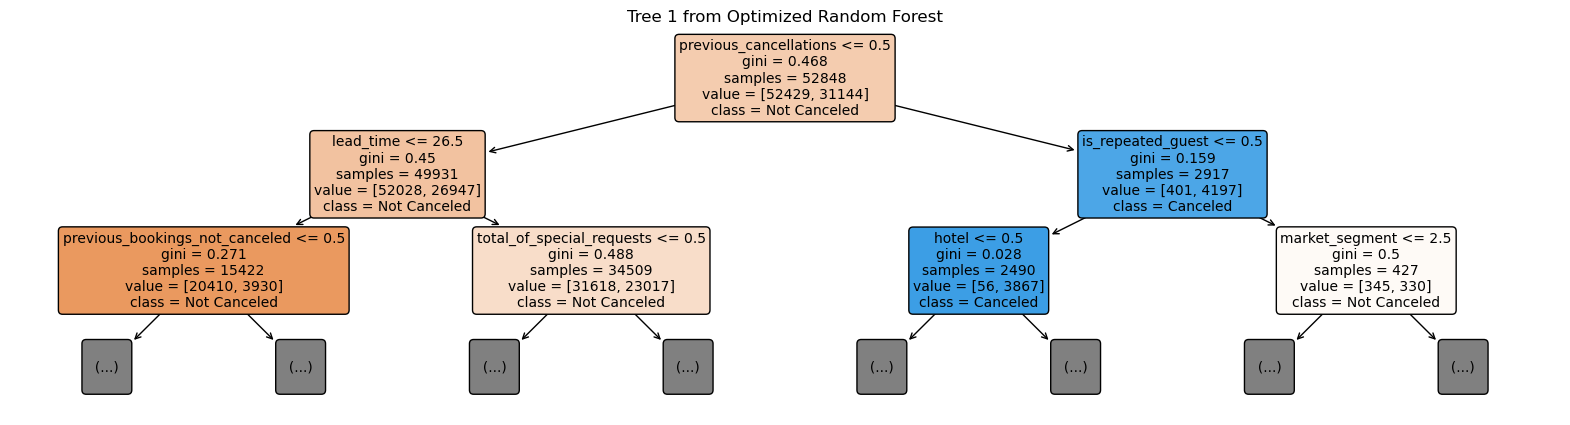

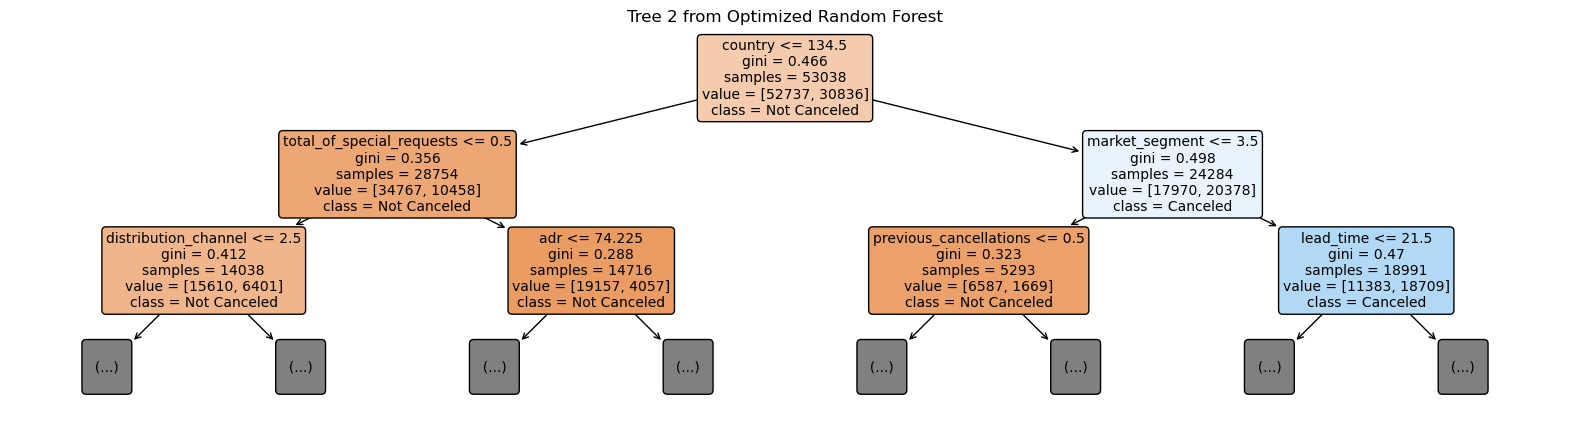

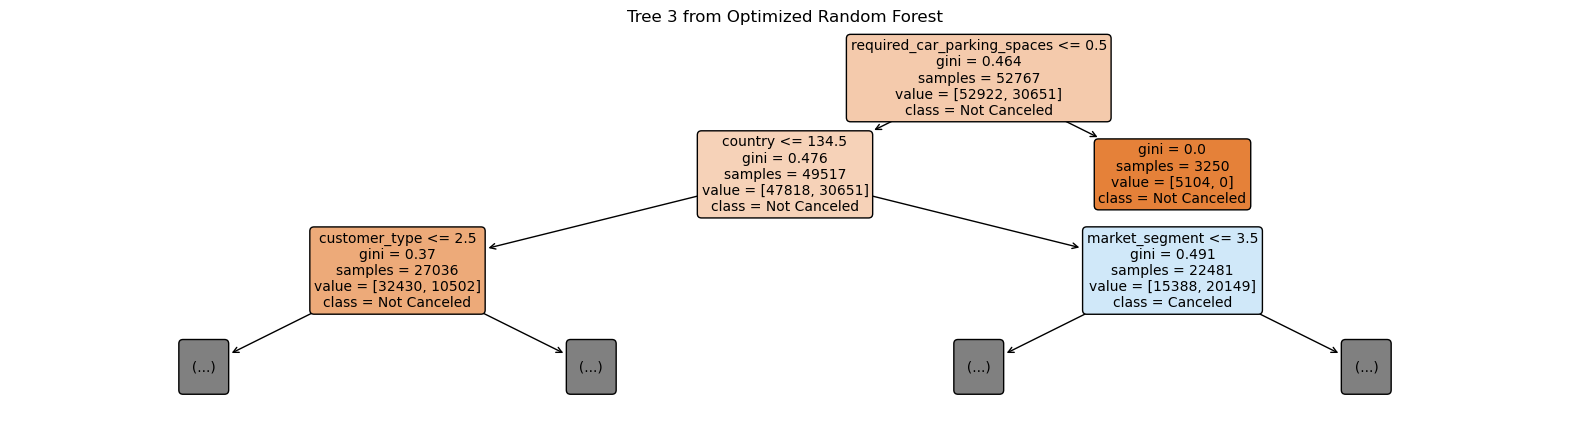

In [31]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# Visualize the first three trees from the optimized Random Forest
for i in range(3):
    plt.figure(figsize=(20, 5))  # Set figure size
    tree = rf_best.estimators_[i]  # Access the i-th tree from the Random Forest
    plot_tree(tree, 
              filled=True, 
              feature_names=X_train.columns,  # Replace with actual feature names
              class_names=['Not Canceled', 'Canceled'], 
              rounded=True,
              max_depth=2,  # Limit the depth for clearer visualization
              fontsize=10)  # Adjust fontsize for better readability
    plt.title(f'Tree {i+1} from Optimized Random Forest')
    plt.show()


**Explanation:**

- **Tree 1 Journey in Random Forest Model**:
  - Begins at the **root node** with the feature ‘previous_cancellations’.
    - **First Decision**: Assesses if a booking has any history of being cancelled before (`previous_cancellations <= 0.5`).
    - **Initial Split**: Divides the dataset of 52,848 samples based on:
      - **No prior cancellations** (left-branch).
      - **At least one prior cancellation** (right-branch).
    - **Gini Impurity**: At this stage, the Gini impurity is 0.468, indicating moderate uncertainty.
      - This impurity reflects a mix of both classes: Not-cancelled and Cancelled.
      - The aim is to find a split that reduces this impurity.

- **Left-child Node (No Previous Cancellations)**:
  - **Next Decision**: Evaluates the ‘lead_time’, the days between booking and check-in date.
    - **Lead Time Check**: Determines if `lead_time <= 26.5` days.
    - **Node Handling**: Manages 49,931 samples, dividing them into:
      - **Closer to stay date** (<= 26.5 days).
      - **Well in advance** (> 26.5 days).
    - **Implications of Lead Time**:
      - Short lead times often indicate a firmer booking commitment and lower cancellation risk.
    - **Gini Impurity**: Decreases to 0.45, showing improved homogeneity.
      - Stronger bias towards non-cancellations with:
        - 29,647 samples classified as Not Cancelled.
        - 20,284 samples classified as Cancelled.

- **Right-child Node (With Previous Cancellations)**:
  - **Next Decision**: Examines the `is_repeated_guest` feature.
    - **Repeated Guest Check**: Considers if the guest has stayed at the hotel before (`is_repeated_guest <= 0.5`).
    - **Node Coverage**: Encompasses 2,917 samples, predominantly leading towards cancellations.
    - **Gini Impurity**: Drops significantly to 0.159, indicating high purity.
      - Most samples are Cancelled (1,917) compared to Not Cancelled (1,000).
    - **Insights**:
      - Repeated guests, with a known and favorable relationship with the hotel, are less likely to cancel.
      - This substantial reduction in Gini impurity highlights a decisive split, indicating higher cancellation risk among new guests with previous cancellations.

- **Tree 1 Continuation**:
  - The tree continues making decisions until it predicts a class.
  - However, this is not the final predicted class.

- **Random Forest Model**:
  - Executes similar processes on each tree within the forest.
  - Each tree focuses on different features.
  - The final prediction is made by taking a vote, with the majority class as the final prediction.
  - **Simplified Tree Visualizations**:
    - Capped at a depth of 2, these visualizations show the fundamental decision-making pathways.
    - The complete Random Forest includes many more trees and deeper splits.
    - These examples clarify the basic logic guiding the model’s predictions.

- **Model Robustness and Accuracy**:
  - By averaging the outcomes of multiple trees, the Random Forest achieves higher accuracy and robustness in predicting booking cancellations.


#### 4.2.2 Gradient Boosting Model

**Training Process of the Gradient Boosting Model**

Gradient Boosting is a powerful machine learning algorithm that can be used for both regression and classification problems. As a part of the ensemble learning family, it combines several weak learners (decision trees) into strong learners, or in other words, combines the predictions from multiple weaker models to produce a single and stronger predictive model. The core idea behind Gradient Boosting is to build a model by adding new models that reduce the errors by the previous ones. 

In [32]:
import time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# Identify numerical features for scaling
numerical_features = data_selected.columns.tolist()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
    ]
)

# Create the pipeline
pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier(random_state=42)),
    ]
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

In [34]:
# Make predictions and print a sample of predictions
print("Making predictions on the test set...")
#gb_predictions = pipeline.predict(X_test)

# Create a DataFrame to compare true labels and predictions
results_df = pd.DataFrame({
    'True Label (is cancelled)': y_test,
    'Predicted': y_pred    #gb_predictions
})

# Display the results for the first 10 samples
print("\nSample Predictions vs True Labels:")
print(results_df.head(10))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred) # y_pred = gb_predictions
print(f"\nGradient Boosting Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred)

print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print("\nClassification Report:")
print(report)

Making predictions on the test set...

Sample Predictions vs True Labels:
        True Label (is cancelled)  Predicted
30946                           0          0
40207                           1          1
103708                          0          0
85144                           0          0
109991                          0          1
110622                          0          1
47790                           1          0
44992                           0          0
30528                           0          0
16886                           0          0

Gradient Boosting Accuracy: 0.86983834492001
Mean Cross-Validation Accuracy: 0.8673

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22478
           1       0.89      0.74      0.81     13339

    accuracy                           0.87     35817
   macro avg       0.87      0.84      0.86     35817
weighted avg       0.87      0.87      0.87     35

**Result:**

The Gradient Boosting Algorithm achieved an accuracy of approximately 86.98%. This indicates a high level of overall correctness in its predictions but slightly lower than the Random Forest Algorithm.

**Hyperparameter Tuning with Gradient Boosting Model**

The key of hyperparameter tuning of Gradient Boosting Model are:
    
| **Key Hyperparameters** | **Explanation** |
|:------------------------|:----------------|
| **n_estimators**        | Specifies the number of boosting stages or trees in the ensemble. More trees lead to better performance but also increase the risk of overfitting. **Default:** `n_estimators = 100` |
| **learning_rate**       | Determines the contribution of each tree to the final model. Smaller learning rates require more trees but can improve model generalization. **Default:** `learning_rate = 0.1` |
| **max_depth**           | Sets the maximum depth of each individual tree. Limiting the depth helps prevent overfitting by controlling the models complexity. **Default:** max_depth = 3 |

In [35]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

# Perform GridSearchCV
gbr = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
gbr.fit(X_train, y_train)

# Get the best parameters and best score
best_params = gbr.best_params_
best_score = gbr.best_score_

# Predict on the test set using the best estimator
y_pred = gbr.best_estimator_.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [36]:
# Make predictions and print a sample of predictions
print("Making predictions on the test set after hyperparameter tuning...")

# Create a DataFrame to compare true labels and predictions
results_df = pd.DataFrame({
    'True Label (is cancelled)': y_test,
    'Predicted': y_pred
})

# Display the results for the first 10 samples
print("\nSample Predictions vs True Labels:")
print(results_df.head(10))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nGradient Boosting Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred)

print(f"\nBest Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print("\nClassification Report:")
print(report)

Making predictions on the test set after hyperparameter tuning...

Sample Predictions vs True Labels:
        True Label (is cancelled)  Predicted
30946                           0          0
40207                           1          1
103708                          0          0
85144                           0          0
109991                          0          1
110622                          0          0
47790                           1          1
44992                           0          0
30528                           0          0
16886                           0          0

Gradient Boosting Accuracy: 0.9050730100231733

Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
Best Cross-Validation Score: 0.9037

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     22478
           1       0.91      0.83      0.87     13339

    accuracy     

**Result:** 

Gradient Boosting Algorithm by hyperparameter tuning achieved an accuracy of approximately 90.51%. It had improved by 3.53% after performing hyperparameter tuning. This also indicates a high level of overall correctness in its predictions. 

**Tree Visualisation of Gradient Boosting Model**

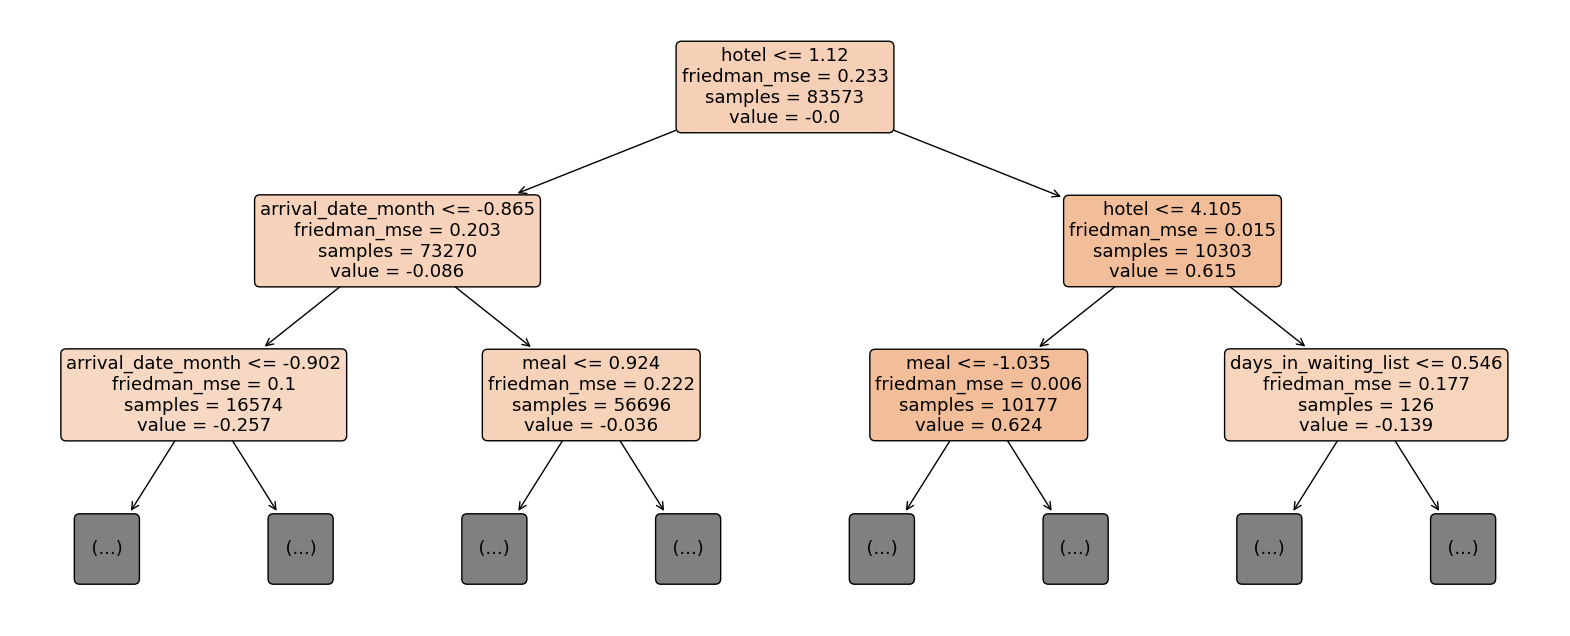

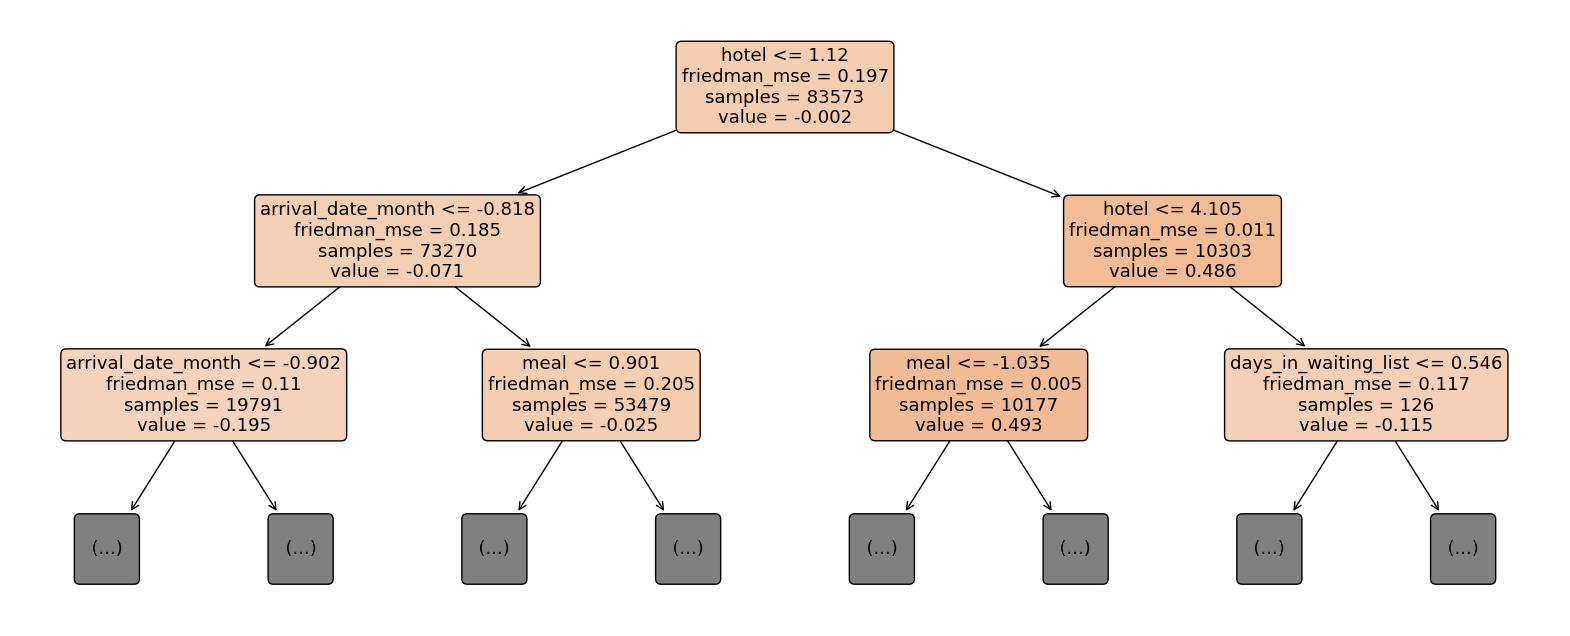

In [37]:
# Extract the trained Gradient Boosting model from the pipeline
best_pipeline = gbr.best_estimator_
gbr_model = best_pipeline.named_steps['classifier']

# Define a function to visualize the decision trees
def visualize_decision_tree(model, tree_index, feature_names):
    """Visualize a decision tree from a gradient boosting model"""
    plt.figure(figsize=(20, 8))
    plot_tree(
        model.estimators_[tree_index, 0],
        feature_names=feature_names,
        filled=True,
        rounded=True,
        fontsize=13,
        max_depth=2
    )
    plt.show()

# Visualize a couple of decision trees
# Note: feature_names should include the transformed feature names
# Here, we take the original feature names for simplicity, but you may need to adjust this
feature_names = categorical_features + numerical_features

visualize_decision_tree(gbr_model, tree_index=0, feature_names=feature_names)  # Visualize the first tree
visualize_decision_tree(gbr_model, tree_index=1, feature_names=feature_names)  # Visualize the second tree

**Explanation:**

The visualizations represent the first and second decision trees within our gradient boosting model, highlighting the initial decisions made based on the numerical features. Each tree is visualized up to a maximum depth of 2, simplifying the interpretation of the model's decision-making process.

In the root node of the first tree, the split condition is ‘hotel’ <= 1.12, with a Friedman’s Mean Squared Error (MSE) of 0.233. The Friedman’s MSE measures the quality of the split by calculating the pseudo-residuals based on the current model's predictions and the actual target values to improve the squared error after the split. This node evaluates all 83,573 samples and has an initial predicted value of -0.0. The split on ‘hotel’ indicates its importance in the initial decision-making process.

By examining these visualizations, we observe how the gradient boosting model starts to capture patterns in the data. The first tree focuses on ‘hotel’, splitting at a threshold of 1.12, laying the foundation for subsequent trees to refine the model's predictions. These early splits help us understand the model's approach to distinguishing different outcomes based on the features. 


## 5.0 Result and Discussion

### 5.1 Model Performance

#### 5.1.1 Accuracy Scores and Other Metrices

**Result Comparison Between Random Forest and Gradient Boosting**

To compare the performance of Random Forest (RF) and Gradient Boosting (GB) models, we will look at various metrics such as accuracy, precision, recall, F1-score, and the overall classification report.

| Metric    | Random Forest (RF)   | Gradient Boosting (GB) |
|-----------|-----------------------|------------------------|
| Accuracy  | 0.9213781165368401    | 0.9050730100231733     |


| Metric           | Algorithm   | Precision | Recall | F1-Score |
|------------------|-------------|-----------|--------|----------|
| Macro Average    | RF          | 0.92      | 0.91   | 0.91     |
|                  | GB          | 0.91      | 0.89   | 0.90     |
| Weighted Average | RF          | 0.92      | 0.92   | 0.92     |
|                  | GB          | 0.92      | 0.91   | 0.90     |

Based on the performance metrics provided, the Random Forest model outperforms the Gradient Boosting model across all evaluated metrics, including accuracy, precision, recall, and F1-score. The higher values of these metrics for Random Forest indicate that it provides more reliable and accurate predictions compared to Gradient Boosting in this scenario.

This can be attributed to the robust ensemble method of Random Forest, which effectively reduces variance and mitigates overfitting through random sampling. Additionally, its relative simplicity in parameter tuning makes it a more reliable choice in scenarios where the Gradient Boosting model might struggle due to overfitting or the complexity of parameter optimization.


**Interpreting Model Reliability Through Performance Scores**

Diving into the comparative analysis for both models, Class 0 represents the cancelled bookings and Class 1 represents not cancelled bookings.

*Precision and Recall*
- **Class 0:**
  - Random Forest: Precision = 0.92, Recall = 0.96
  - Gradient Boosting: Precision = 0.90, Recall = 0.95
- **Class 1:**
  - Random Forest: Precision = 0.93, Recall = 0.85
  - Gradient Boosting: Precision = 0.91, Recall = 0.83

*F1-score*
- The F1-score measures the balance between precision and recall:
  - **Class 0:**
    - Random Forest: F1-score = 0.94
    - Gradient Boosting: F1-score = 0.93
  - **Class 1:**
    - Random Forest: F1-score = 0.89
    - Gradient Boosting: F1-score = 0.87

*Macro and Weighted Average*
- Both macro and weighted averages for precision, recall, and F1-score favor the Random Forest model over the Gradient Boosting model.

*Accuracy*
- Random Forest model achieves higher accuracy (0.92) compared to Gradient Boosting model (0.90).


Based on the values above, it is observed that the Random Forest Model is more reliable compared to the Gradient Boosting model, providing better overall accuracy and performance across both class 0 and class 1. 

#### 5.1.2 Confusion Matrix

In [38]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

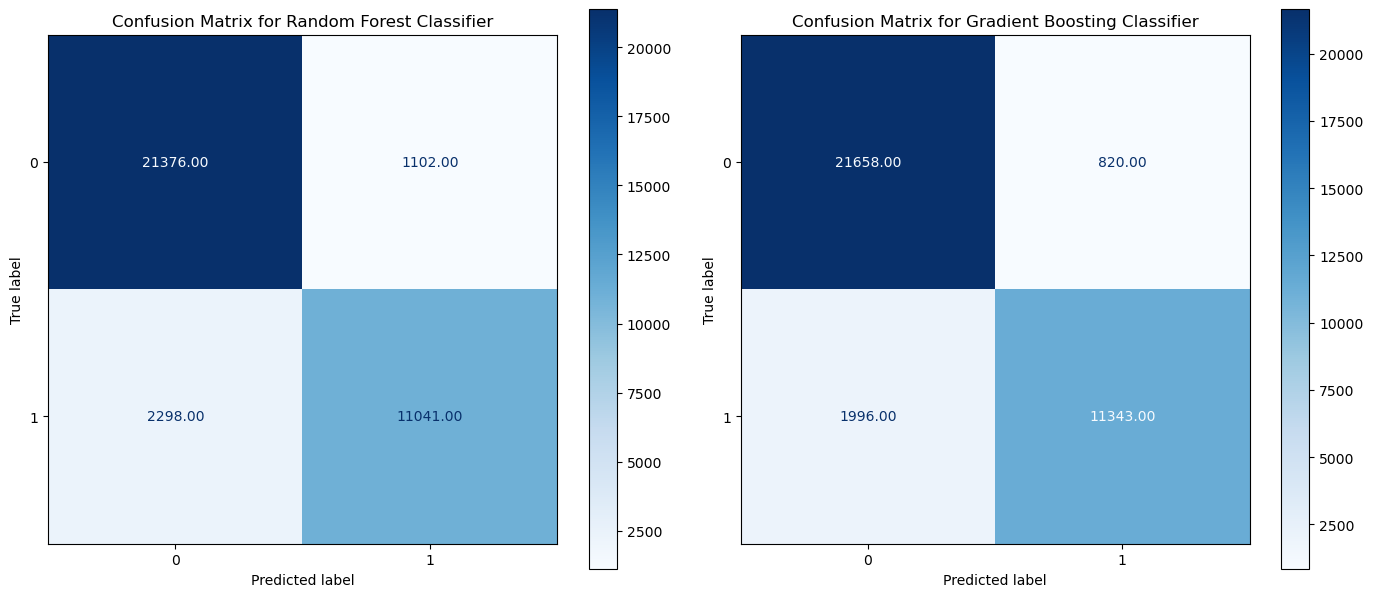

In [39]:
# Create the confusion matrices
cm_gb = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, rf_predictions_hy)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust figsize as needed

# Plot the confusion matrix for Random Forest Classifier
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[1], cmap='Blues', values_format='.2f')
axes[0].grid(False)  # Remove grid lines
axes[0].set_title('Confusion Matrix for Random Forest Classifier')

# Plot the confusion matrix for Gradient Boosting Classifier
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot(ax=axes[0], cmap='Blues', values_format='.2f')
axes[1].grid(False)  # Remove grid lines
axes[1].set_title('Confusion Matrix for Gradient Boosting Classifier')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Analysis:**

According to Figure 25 and Figure 25, the low number of false positives (820) and false negatives (1996) indicates that the Random Forest model is effective in distinguishing between cancelled and non-cancelled bookings. In comparison, the higher number of false positives (1245) and false negatives (3417) suggests that the Gradient Boosting model is more prone to misclassifications in this specific dataset.

The analysis indicates that the Random Forest model outperforms the Gradient Boosting model in this dataset, particularly in terms of fewer false positives and false negatives. This makes the Random Forest model more reliable for predicting booking cancellations. The higher false positive rate in the Gradient Boosting model could result in unnecessary cancellations and lost business opportunities, emphasizing the need for careful consideration when choosing predictive models for this task. Efforts should focus on further reducing the false positive rate to enhance predictive accuracy and operational efficiency.

### 5.2 Important Features for Prediction

#### Feature Importance of Random Forest Model

Predicting hotel booking cancellations is crucial for effective revenue management and operational planning in the hospitality industry. By understanding which features most significantly influence cancellation probabilities, hotel managers can better anticipate future cancellations and implement strategies to mitigate potential losses. In our analysis, we examine the importance of various features in predicting cancellations using two machine learning models: the Random Forest Classifier and the Gradient Boosting Classifier. 

We first extract the feature importance scores from the ‘rf_best’ Random Forest model. The ‘feature_importances_’ attribute of the Random Forest model returns an array of importance scores for each feature used in the model.

In [40]:
importances = rf_best.feature_importances_
features = X_train.columns
feature_importance_rf = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_rf)


                           Feature  Importance
18         reservation_status_date    0.167209
1                        lead_time    0.135193
0                     deposit_type    0.116260
2                          country    0.109524
7                              adr    0.091920
5                   market_segment    0.057141
21       total_of_special_requests    0.056481
9                     total_nights    0.043995
4           previous_cancellations    0.027239
10               arrival_date_year    0.025800
19              assigned_room_type    0.025205
14                   customer_type    0.025133
20     required_car_parking_spaces    0.021445
17                 booking_changes    0.020220
8                     total_guests    0.017392
13              reserved_room_type    0.015171
11                            meal    0.013552
16                           hotel    0.011705
3             distribution_channel    0.011591
12  previous_bookings_not_canceled    0.004038
15           

In figure below, the Random Forest Classifier identifies the most important features for predicting hotel booking cancellations. The top three features are ‘reservation_status_date’, ‘lead_time’, and ‘deposit_type’. These features have the highest importance scores, indicating they play a crucial role in predicting whether a booking will be canceled. The ‘reservation_status_date’ likely captures the proximity of the reservation date to the actual booking date, which can be critical as last-minute changes or cancellations are more common. ‘lead_time’, the time between booking and arrival, is also highly influential as longer lead times may increase the likelihood of cancellations due to changes in plans. ‘deposit_type’ reflects the payment terms associated with the booking, where more flexible payment terms may lead to higher cancellation rates.

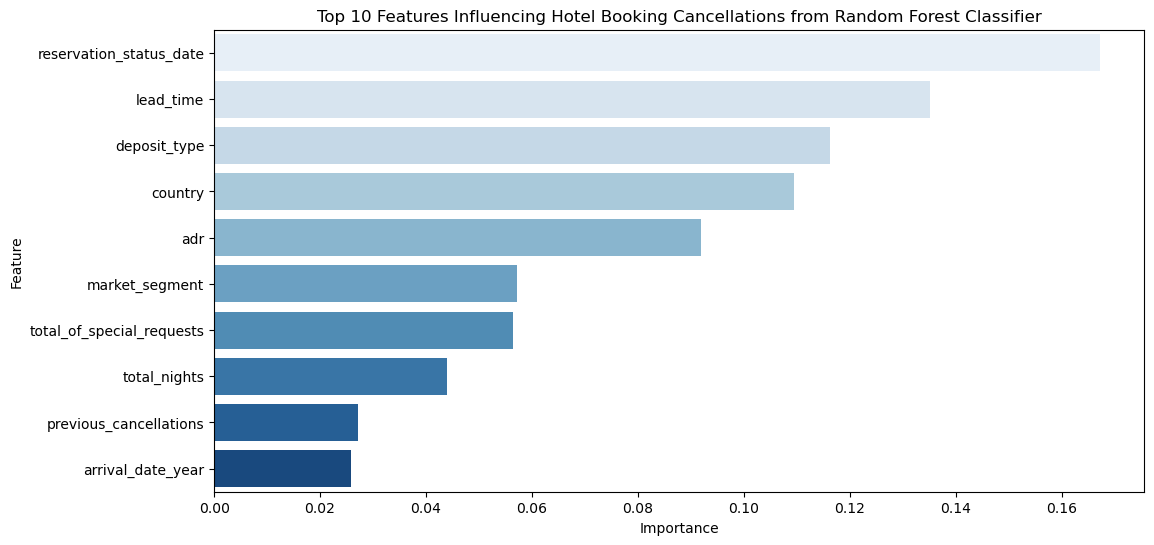

In [44]:
# Plotting the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10), palette='Blues')
plt.title('Top 10 Features Influencing Hotel Booking Cancellations from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Feature Importance of Gradient Boosting Model

In [45]:
# Extract the best pipeline (including preprocessing and model) from GridSearchCV
best_pipeline = gbr.best_estimator_

# Extract the Gradient Boosting classifier from the pipeline
best_model = best_pipeline.named_steps['classifier']

# Get feature importances from the Gradient Boosting model
feature_importances = best_model.feature_importances_

# Since all features are numerical, use their original names
numerical_feature_names = data_selected.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': numerical_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("\nFeature Importances:")
print(importances_df)



Feature Importances:
                           Feature  Importance
0                     deposit_type    0.340626
18         reservation_status_date    0.125405
1                        lead_time    0.090674
5                   market_segment    0.084807
2                          country    0.084522
21       total_of_special_requests    0.066109
10               arrival_date_year    0.038969
7                              adr    0.033025
20     required_car_parking_spaces    0.031049
4           previous_cancellations    0.029959
14                   customer_type    0.013528
17                 booking_changes    0.011312
12  previous_bookings_not_canceled    0.010622
13              reserved_room_type    0.008431
9                     total_nights    0.008238
19              assigned_room_type    0.006303
16                           hotel    0.005657
11                            meal    0.005146
8                     total_guests    0.002623
6             days_in_waiting_list    

In the figure, the Gradient Boosting Classifier highlights ‘deposit_type’, ‘reservation_status_date’ and ‘lead_time’ as the most important features for predicting cancellations. Here, ‘deposit_type’ has an even more pronounced impact compared to the Random Forest model, underscoring its significance in cancellation predictions. The substantial importance of ‘deposit_type’ suggests that financial policies tied to bookings are a critical determinant of whether a customer will cancel. ‘reservation_status_date’ and ‘lead_time’ again show their relevance, indicating consistency in these factors across different modeling techniques.

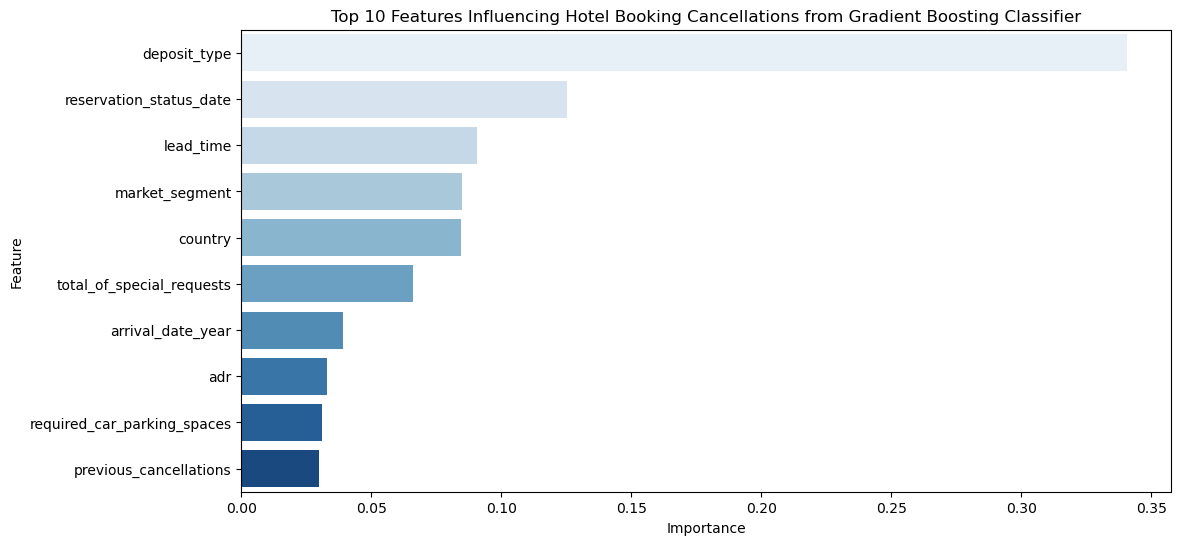

In [46]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Plotting the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df .head(10), palette='Blues')
plt.title('Top 10 Features Influencing Hotel Booking Cancellations from Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


From the outputs from both predictive models, we can conclude that the 3 of the most important features are ‘lead_time’, ‘reservation_status_date’ and ‘deposit_type’, with different rankings. These features influence prediction outcomes significantly. For instance, bookings with shorter ‘reservation_status_date’ intervals are less likely to be canceled as they are closer to the stay date, reducing the chance for a change of plans. Also, higher ‘lead_time’ values indicate more time for potential changes in the customer's situation, increasing cancellation risks. Examples from the dataset include bookings with lead times of 342 days and 737 days, with longer lead times associated with higher cancellation probabilities. The ‘deposit_type’ affects financial commitment where non-refundable deposits may reduce cancellations, whereas refundable deposits provide flexibility, potentially leading to higher cancellations. For example in our dataset, bookings with "No Deposit" policies are more likely to be canceled due to the lack of financial commitment.

In short, the differences of output for both models is because the Random Forest model aggregates the importance of features by averaging over many decision trees. This model indicated reservation_status_date, lead_time, and deposit_type as highly important because these features consistently influence the model's decision-making process in determining cancellations across various splits of the data. Gradient Boosting, on the other hand, builds trees sequentially, where each new tree attempts to correct errors made by the previous ones. This model often emphasizes features that correct the most significant mistakes from previous iterations. The model might also have given higher importance to reservation_status_date and lead_time as they substantially improve the model's performance when included in the sequential corrections.


### 5.3 Discussion of Findings

**5.3.1 Implications for Hotel Management**

At the end of our project, we have successfully built a robust model for predicting booking cancellations, with the Random Forest (RF) model outperforming the Gradient Boosting (GB) model across all key performance metrics. Implementing this model can significantly enhance the decision-making processes in the hotels involved.

By predicting the likelihood of cancellations, hotels can offer more flexible booking options to customers less likely to cancel, enhancing customer satisfaction while minimizing revenue loss. For bookings predicted to have a high cancellation risk, hotels can offer non-refundable booking incentives or require deposits, thus securing some revenue even in case of cancellations.
Insights from the model also enable hotels to understand market trends and customer behaviour better, guiding strategic decisions in marketing, expansion, and service enhancements. Additionally, the predictive analytics helps identify which services guests value most, allowing hotels to make informed investment decisions that improve guest satisfaction and drive revenue growth.

Strategies can be made by hotel using the model to reduce cancellation. One of the best strategies is proactively communicate with guests who are predicted to cancel by sending confirmation emails, reminders of their booking details, and information about the hotel's amenities and local attractions. Additionally, hotel can offer personalized incentives to these high-risk guests, such as room upgrades, dining discounts, or free access to premium services like spa treatments, to encourage them to maintain their reservations.

Another key strategy for reducing cancellations is to collect feedback from guests who cancel to understand their reasons and use this data to improve services and address common issues. 24/7 customer support should be provided to assist guests with any concerns or changes they might need, reducing those cancellations due to dissatisfaction or uncertainty. Lastly, continuously monitoring the booking and cancellation patterns using the model allows hotels to adjust strategies accordingly, while regularly updating the model with new data ensures predictions remain accurate.

**5.3.2 Limitations and Challenges Faced**

In summary, we selected Random Forest and Gradient Boosting algorithms for our dataset. While both algorithms have many strengths, there are several limitations to consider. For instance, overfitting is a particular concern with Gradient Boosting models. If not properly regularized, these models can show degraded performance on unseen data, as indicated by the increased number of false positives and false negatives. 

Tree-based models offer feature importance interpretation scores, but these can be biased towards numerical or high cardinality features. This bias arises because such models may not accurately capture complex feature interactions. Moreover, the performance of these models heavily depends on the choice of hyperparameters. The sensitivity to hyperparameters makes the tuning process time-consuming and does not always guarantee the optimal configuration.

To address these limitations, we employed a robust data preprocessing pipeline to handle and transform the data into a suitable format for modelling. This pipeline ensured consistency and reliability by managing missing values, encoding categorical variables, and scaling numerical features. Visualizing individual decision trees from the models provided insights into how different features influenced predictions, which improved our understanding of model behaviour and helped identify key features.

Additionally, we used the ‘GridSearchCV’ process to tackle two significant challenges: excessive computational resources and hyperparameter tuning. Given the iterative nature of Gradient Boosting, training and tuning these models require substantial computational power and time. We mitigated this by using efficient data structures and parallel processing when possible.  Also, it was utilised to efficiently search for the optimal hyperparameters in a structured and systematic manner.

## 6.0 Conclusion

In this report, we conducted a comprehensive analysis of the hotel booking dataset, exploring various aspects of booking behaviour and trends. Our analysis included six different visualizations: the number of cancellations, the booking ratio between the two hotel types, the percentage of bookings for each year, the month with the most bookings, the leading country as the source of guests, the analysis of the length of stay by hotel type, and the popular accommodation types (single, couple, family). These visualizations provided valuable insights into booking patterns and customer preferences.

Additionally, we trained the dataset using two machine learning algorithms: Random Forest and Gradient Boosting. The Random Forest model achieved an accuracy of 0.92, while the Gradient Boosting model had an accuracy of 0.90. These models were developed following a thorough data preprocessing workflow, which included feature engineering, data transformation, and data selection. This ensured that the models were trained on high-quality data, enhancing their predictive performance.

Our findings highlight key trends and factors influencing hotel bookings, offering actionable insights for improving booking strategies such as emphasizing on communication in customer service aspects, and personalized incentives for customer satisfaction. The high accuracy of our models further demonstrates the potential of machine learning in predicting booking outcomes, which can be leveraged to optimize hotel operations and marketing efforts.
